In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


# for performance checking
import time

# code formatter
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# pip install nb-black

<IPython.core.display.Javascript object>

In [3]:
# nltk.download("wordnet")

<IPython.core.display.Javascript object>

In [4]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


<IPython.core.display.Javascript object>

In [5]:
from sklearn.preprocessing import MinMaxScaler
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

<IPython.core.display.Javascript object>

In [6]:
# pip install wordcloud

<IPython.core.display.Javascript object>

In [7]:
from wordcloud import WordCloud

<IPython.core.display.Javascript object>

In [8]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

<IPython.core.display.Javascript object>

In [9]:
# pip install vaderSentiment

<IPython.core.display.Javascript object>

In [10]:
# Supressing the SettingWithCopyWarning, by changing the value to 'None' from 'warn'(default)
pd.options.mode.chained_assignment = None

<IPython.core.display.Javascript object>

## Reading and Exploring the Dataset

In [11]:
df = pd.read_csv(os.path.join(".", "Myer Briggs Data", "Data.csv"))
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


<IPython.core.display.Javascript object>

In [12]:
train_df, test_df = train_test_split(
    df, random_state=0, test_size=0.04, stratify=df["type"]
)

train_df.to_csv(os.path.join(".", "Myer Briggs Data", "train_data.csv"))
test_df.to_csv(os.path.join(".", "Myer Briggs Data", "test_data.csv"))

<IPython.core.display.Javascript object>

In [13]:
train_df.reset_index(inplace=True, drop=True)
test_df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [14]:
train_df.head()

,type,posts
0,ESTP,"'cool, we can do it together.|||Do you not fin..."
1,INFP,'INFP = Forest..... I am supremely content abo...
2,INTP,'One of my favorites: https://www.youtube.com...
3,ENFP,'I rarely make art but when I do it's mostly t...
4,INFJ,'I respect your opinion. I don't really know a...


<IPython.core.display.Javascript object>

In [15]:
print(train_df["type"].value_counts())
print(test_df["type"].value_counts())

INFP    1759
INFJ    1411
INTP    1252
INTJ    1047
ENTP     658
ENFP     648
ISTP     324
ISFP     260
ENTJ     222
ISTJ     197
ENFJ     182
ISFJ     159
ESTP      86
ESFP      46
ESFJ      40
ESTJ      37
Name: type, dtype: int64
INFP    73
INFJ    59
INTP    52
INTJ    44
ENTP    27
ENFP    27
ISTP    13
ISFP    11
ENTJ     9
ENFJ     8
ISTJ     8
ISFJ     7
ESTP     3
ESFP     2
ESTJ     2
ESFJ     2
Name: type, dtype: int64


<IPython.core.display.Javascript object>

In [16]:
train_df.shape

(8328, 2)

<IPython.core.display.Javascript object>

In [17]:
train_df.isna().sum()

type     0
posts    0
dtype: int64

<IPython.core.display.Javascript object>

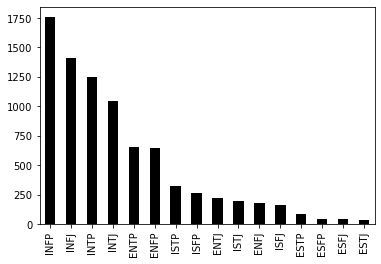

<IPython.core.display.Javascript object>

In [18]:
train_df.type.value_counts().plot(kind="bar", color="k")
plt.show()

In [19]:
train_df["is_Introvert"] = train_df["type"].apply(lambda x: 1 if x[0] == "I" else 0)
train_df["is_Intuitive"] = train_df["type"].apply(lambda x: 1 if x[1] == "N" else 0)
train_df["is_Feeling"] = train_df["type"].apply(lambda x: 1 if x[2] == "F" else 0)
train_df["is_Perceptive"] = train_df["type"].apply(lambda x: 1 if x[3] == "P" else 0)

<IPython.core.display.Javascript object>

In [20]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0
...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1


<IPython.core.display.Javascript object>

### Note:

-  Introversion vs. Extroversion
    - I -> 1
    - E -> 0
-  Intuition vs. Sensing
    - N -> 1
    - S -> 0
-  Feeling vs. Thinking
    - F -> 1
    - T -> 0
-  Perceiving vs. Judging
    - P -> 1
    - J -> 0

In [21]:
pd.melt(train_df[["is_Introvert", "is_Intuitive", "is_Feeling", "is_Perceptive"]])

,variable,value
0,is_Introvert,0
1,is_Introvert,1
2,is_Introvert,1
3,is_Introvert,0
4,is_Introvert,1
...,...,...
33307,is_Perceptive,0
33308,is_Perceptive,1
33309,is_Perceptive,1
33310,is_Perceptive,1


<IPython.core.display.Javascript object>

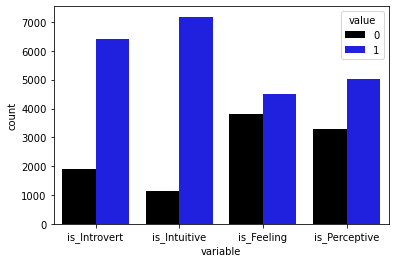

<IPython.core.display.Javascript object>

In [22]:
sns.countplot(
    x="variable",
    hue="value",
    data=pd.melt(
        train_df[["is_Introvert", "is_Intuitive", "is_Feeling", "is_Perceptive"]]
    ),
    palette=["k", "b"],
)
plt.show()

In [23]:
## Checking if there is any correlation between the features

correlation = train_df[
    ["is_Introvert", "is_Intuitive", "is_Feeling", "is_Perceptive"]
].corr()
correlation.style.background_gradient(cmap="mako").format(precision=3)

,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive
is_Introvert,1.000,-0.046,0.070,-0.162
is_Intuitive,-0.046,1.000,0.081,-0.015
is_Feeling,0.070,0.081,1.000,-0.005
is_Perceptive,-0.162,-0.015,-0.005,1.000


<IPython.core.display.Javascript object>

## Feature Engineering

In [45]:
## Cleaning the posts

train_df["cleaned_posts"] = train_df["posts"].str.lower()
train_df.loc[:, "cleaned_posts"] = train_df["cleaned_posts"].str.replace(
    re.compile(r"\|\|\|"), " "
)
train_df.loc[:, "cleaned_posts"] = train_df["cleaned_posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), ""
)
train_df.loc[:, "cleaned_posts"] = train_df["cleaned_posts"].str.replace(
    re.compile(r"\S+@\S+"), ""
)
train_df.loc[:, "cleaned_posts"] = train_df["cleaned_posts"].str.replace(
    re.compile(r"[^a-z\s]"), ""
)

mbpi = train_df["type"].unique()
for index in mbpi:
    train_df.loc[:, "cleaned_posts"] = train_df["cleaned_posts"].str.replace(
        index.lower(), ""
    )

<IPython.core.display.Javascript object>

In [46]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,negative_score,tag_post
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool we can do it together do you not find eag...,0.999550,0.624000,0.514247,0.131579,"['cool, we can do it together., Do you not fin..."
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest i am supremely content about this ive...,0.999750,0.708571,0.363636,0.196491,['INFP = Forest..... I am supremely content ab...
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one of my favorites current least favorite ...,0.998800,0.672000,0.335142,0.289474,['One of my favorites: https://www.youtube.co...
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,i rarely make art but when i do its mostly to ...,0.999750,0.682286,0.389417,0.203509,['I rarely make art but when I do it's mostly ...
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,i respect your opinion i dont really know any ...,0.999200,0.672000,0.359566,0.259649,['I respect your opinion. I don't really know ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,this bullshit is why i am never consistently o...,0.998850,0.627429,0.370421,0.312281,['This bullshit is why I am never consistently...
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock on my door becauase i ...,0.996799,0.716571,0.398915,0.138596,[you're gonna hafta knock on my door becauase ...
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greetings to you too insert p...,0.999850,0.634286,0.451832,0.196491,['SpreeFirit Warm greetings to you too! *inse...
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed as the party who is much more often the...,0.999250,0.613714,0.379919,0.322807,"['Agreed, as the party who is much more often ..."


<IPython.core.display.Javascript object>

In [49]:
## removing words that are 1-2 long

train_df.loc[:, "cleaned_posts"] = train_df["cleaned_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), ""
)

<IPython.core.display.Javascript object>

In [48]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,negative_score,tag_post
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool together find eagle sexy wink holyshizzy ...,0.999550,0.624000,0.514247,0.131579,"['cool, we can do it together., Do you not fin..."
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest supremely content ive attracted dark ...,0.999750,0.708571,0.363636,0.196491,['INFP = Forest..... I am supremely content ab...
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one favorite current least favorite friend ...,0.998800,0.672000,0.335142,0.289474,['One of my favorites: https://www.youtube.co...
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,rarely make art mostly export imaginative conc...,0.999750,0.682286,0.389417,0.203509,['I rarely make art but when I do it's mostly ...
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,respect opinion dont really know honest hurt e...,0.999200,0.672000,0.359566,0.259649,['I respect your opinion. I don't really know ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,bullshit never consistently lol im actually go...,0.998850,0.627429,0.370421,0.312281,['This bullshit is why I am never consistently...
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock door becauase never le...,0.996799,0.716571,0.398915,0.138596,[you're gonna hafta knock on my door becauase ...
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greeting insert picture cute ...,0.999850,0.634286,0.451832,0.196491,['SpreeFirit Warm greetings to you too! *inse...
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed party much often clingee rather clinger...,0.999250,0.613714,0.379919,0.322807,"['Agreed, as the party who is much more often ..."


<IPython.core.display.Javascript object>

In [47]:
## Lemmatizing

t = time.time()

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

train_df.loc[:, "cleaned_posts"] = train_df["cleaned_posts"].apply(
    lambda x: " ".join(
        [lemmatizer.lemmatize(word) for word in x.split(" ") if word not in stop_words]
    )
)
print("Time taken for Lemmatizing the train dataset is : ", time.time() - t)

Time taken for Lemmatizing the train dataset is :  25.692634344100952


<IPython.core.display.Javascript object>

In [50]:
train_df.head()

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,negative_score,tag_post
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool together find eagle sexy wink holyshizzy ...,0.99955,0.624000,0.514247,0.131579,"['cool, we can do it together., Do you not fin..."
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest supremely content ive attracted dark ...,0.99975,0.708571,0.363636,0.196491,['INFP = Forest..... I am supremely content ab...
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one favorite current least favorite friend ...,0.99880,0.672000,0.335142,0.289474,['One of my favorites: https://www.youtube.co...
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,rarely make art mostly export imaginative conc...,0.99975,0.682286,0.389417,0.203509,['I rarely make art but when I do it's mostly ...
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,respect opinion dont really know honest hurt e...,0.99920,0.672000,0.359566,0.259649,['I respect your opinion. I don't really know ...


<IPython.core.display.Javascript object>

In [51]:
train_df.shape

(8328, 12)

<IPython.core.display.Javascript object>

In [52]:
train_df.loc[:2, "cleaned_posts"]

0    cool together find eagle sexy wink holyshizzy ...
1      forest supremely content ive attracted dark ...
2    one favorite    current least favorite friend ...
Name: cleaned_posts, dtype: object

<IPython.core.display.Javascript object>

In [53]:
## Sentiment Analysis Score

t = time.time()

vader_analyzer = SentimentIntensityAnalyzer()
sentiment_analysis_scores = []

for post in train_df["cleaned_posts"]:
    scores = vader_analyzer.polarity_scores(post)
    sentiment_analysis_scores.append(scores)

print("The time taken for Sentiment Analysis are : ", time.time() - t)

The time taken for Sentiment Analysis are :  418.6420547962189


<IPython.core.display.Javascript object>

In [54]:
train_df["compound_score"] = [score["compound"] for score in sentiment_analysis_scores]
train_df["neutral_score"] = [score["neu"] for score in sentiment_analysis_scores]
train_df["positive_score"] = [score["pos"] for score in sentiment_analysis_scores]
train_df["negative_score"] = [score["neg"] for score in sentiment_analysis_scores]

<IPython.core.display.Javascript object>

In [55]:
train_df.tail()

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,negative_score,tag_post
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,bullshit never consistently lol actually goin...,0.9976,0.546,0.275,0.179,['This bullshit is why I am never consistently...
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock door becauase never le...,0.9935,0.625,0.295,0.079,[you're gonna hafta knock on my door becauase ...
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greeting insert picture cute ...,0.9996,0.555,0.333,0.112,['SpreeFirit Warm greetings to you too! *inse...
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed party much often clingee rather clinger...,0.9984,0.536,0.280,0.184,"['Agreed, as the party who is much more often ..."
8327,INTP,'Unpleasant and unhappy because of that feelin...,1,1,0,1,unpleasant unhappy feeling feeling youre losin...,0.9993,0.560,0.303,0.137,['Unpleasant and unhappy because of that feeli...


<IPython.core.display.Javascript object>

In [56]:
train_df.loc[train_df["compound_score"] < 0].index

Int64Index([  16,   27,   30,   31,   49,   72,   97,  111,  152,  287,
            ...
            7868, 7933, 7956, 8035, 8116, 8121, 8150, 8188, 8257, 8284],
           dtype='int64', length=260)

<IPython.core.display.Javascript object>

In [57]:
np.array(train_df["compound_score"]).shape

(8328,)

<IPython.core.display.Javascript object>

In [58]:
## scaling the values to fit between 0 & 1 for MultinomialNB(since, Naive Bayes can't handle negative values)

scaler = MinMaxScaler(copy=False)

train_df.loc[:, "compound_score"] = scaler.fit_transform(
    np.array(train_df["compound_score"]).reshape(-1, 1)
)
train_df.loc[:, "positive_score"] = scaler.fit_transform(
    np.array(train_df["positive_score"]).reshape(-1, 1)
)
train_df.loc[:, "neutral_score"] = scaler.fit_transform(
    np.array(train_df["neutral_score"]).reshape(-1, 1)
)
train_df.loc[:, "negative_score"] = scaler.fit_transform(
    np.array(train_df["negative_score"]).reshape(-1, 1)
)

<IPython.core.display.Javascript object>

In [59]:
train_df.loc[train_df["compound_score"] < 0].index

Int64Index([], dtype='int64')

<IPython.core.display.Javascript object>

In [60]:
train_df.isna().sum()

type              0
posts             0
is_Introvert      0
is_Intuitive      0
is_Feeling        0
is_Perceptive     0
cleaned_posts     0
compound_score    0
neutral_score     0
positive_score    0
negative_score    0
tag_post          0
dtype: int64

<IPython.core.display.Javascript object>

In [61]:
train_df.shape

(8328, 12)

<IPython.core.display.Javascript object>

In [62]:
print(type(train_df.loc[0, "posts"]))
print(type(train_df.loc[:2, "posts"]))

<class 'str'>
<class 'pandas.core.series.Series'>


<IPython.core.display.Javascript object>

In [63]:
## Parts Of Speech Tagging

# replacing urls with domain name
train_df["tag_post"] = train_df["posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z0-9_-])+([\S])*"), lambda match: match.group
)


# Below line of code can be replaced by, train_df.loc[:, 'tag_post'] = train_df['tag_post'].tolist(sep = '\|\|\|')
train_df.loc[:, "tag_post"] = np.array(
    [post for post in train_df["posts"].str.split("\|\|\|")], dtype="object"
)

<IPython.core.display.Javascript object>

In [64]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,negative_score,tag_post
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool together find eagle sexy wink holyshizzy ...,0.999550,0.614857,0.522267,0.131579,"['cool, we can do it together., Do you not fin..."
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest supremely content ive attracted dark ...,0.999750,0.707429,0.363023,0.198246,['INFP = Forest..... I am supremely content ab...
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one favorite current least favorite friend ...,0.998800,0.670857,0.334683,0.289474,['One of my favorites: https://www.youtube.co...
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,rarely make art mostly export imaginative conc...,0.999750,0.682286,0.387314,0.203509,['I rarely make art but when I do it's mostly ...
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,respect opinion dont really know honest hurt e...,0.999200,0.669714,0.357625,0.259649,['I respect your opinion. I don't really know ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,bullshit never consistently lol actually goin...,0.998850,0.624000,0.371120,0.314035,['This bullshit is why I am never consistently...
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock door becauase never le...,0.996799,0.714286,0.398111,0.138596,[you're gonna hafta knock on my door becauase ...
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greeting insert picture cute ...,0.999850,0.634286,0.449393,0.196491,['SpreeFirit Warm greetings to you too! *inse...
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed party much often clingee rather clinger...,0.999250,0.612571,0.377868,0.322807,"['Agreed, as the party who is much more often ..."


<IPython.core.display.Javascript object>

In [65]:
t = time.time()

train_df["word_tags"] = train_df["tag_post"].apply(
    lambda post: [nltk.pos_tag(word_tokenize(line)) for line in post]
)

print("Time taken for Parts Of Speech tagging : ", time.time() - t)

Time taken for Parts Of Speech tagging :  1016.8606796264648


<IPython.core.display.Javascript object>

In [66]:
train_df.loc[0, "word_tags"]

[[("'cool", 'NN'),
  (',', ','),
  ('we', 'PRP'),
  ('can', 'MD'),
  ('do', 'VB'),
  ('it', 'PRP'),
  ('together', 'RB'),
  ('.', '.')],
 [('Do', 'VB'),
  ('you', 'PRP'),
  ('not', 'RB'),
  ('find', 'VB'),
  ('eagles', 'JJ'),
  ('sexy', 'NNS'),
  (':', ':'),
  ('wink', 'NN'),
  (':', ':')],
 [('HOLYSHIZZY', 'NNP'),
  ('Rebelgoatalliance', 'NNP'),
  ('spidershane', 'NN'),
  ('ENIGMA15', 'NNP'),
  ('Zaknafein', 'NNP'),
  ('hellofornow', 'VBD'),
  ('Blazy', 'NNP'),
  ('absylution', 'NN'),
  ('Alex', 'NNP'),
  ('ESTP', 'NNP'),
  ('aquaswim', 'VBZ'),
  ('BronzeHareV', 'NNP'),
  ('Cataclysm', 'NNP'),
  ('EIA', 'NNP'),
  ('ESTP_Chick', 'NNP'),
  ('Firefingers', 'NNP'),
  ('Fleetfoot', 'NNP'),
  ('GoggleGirl', 'NNP'),
  ('Ista', 'NNP'),
  ('John_Goofman', 'NNP'),
  ('...', ':')],
 [('http', 'NN'),
  (':', ':'),
  ('//personalitycafe.com/estp-forum-doers/830866-estp-introduction-tread.html',
   'JJ'),
  ('#', '#'),
  ('post27539306', 'NN')],
 [('I', 'PRP'),
  ("'m", 'VBP'),
  ('doing', 'VBG'),


<IPython.core.display.Javascript object>

In [67]:
for i, val in train_df.loc[:2, "word_tags"].items():
    print(i, val)

0 [[("'cool", 'NN'), (',', ','), ('we', 'PRP'), ('can', 'MD'), ('do', 'VB'), ('it', 'PRP'), ('together', 'RB'), ('.', '.')], [('Do', 'VB'), ('you', 'PRP'), ('not', 'RB'), ('find', 'VB'), ('eagles', 'JJ'), ('sexy', 'NNS'), (':', ':'), ('wink', 'NN'), (':', ':')], [('HOLYSHIZZY', 'NNP'), ('Rebelgoatalliance', 'NNP'), ('spidershane', 'NN'), ('ENIGMA15', 'NNP'), ('Zaknafein', 'NNP'), ('hellofornow', 'VBD'), ('Blazy', 'NNP'), ('absylution', 'NN'), ('Alex', 'NNP'), ('ESTP', 'NNP'), ('aquaswim', 'VBZ'), ('BronzeHareV', 'NNP'), ('Cataclysm', 'NNP'), ('EIA', 'NNP'), ('ESTP_Chick', 'NNP'), ('Firefingers', 'NNP'), ('Fleetfoot', 'NNP'), ('GoggleGirl', 'NNP'), ('Ista', 'NNP'), ('John_Goofman', 'NNP'), ('...', ':')], [('http', 'NN'), (':', ':'), ('//personalitycafe.com/estp-forum-doers/830866-estp-introduction-tread.html', 'JJ'), ('#', '#'), ('post27539306', 'NN')], [('I', 'PRP'), ("'m", 'VBP'), ('doing', 'VBG'), ('this', 'DT'), ('for', 'IN'), ('Drunk', 'NNP'), ('Parrot', 'NNP'), ('and', 'CC'), ('to

<IPython.core.display.Javascript object>

In [68]:
tag_set = set()

for i, values in train_df["word_tags"].items():
    for val in values[0]:
        tag_set.add(val[1])

tag_list = list(tag_set)

<IPython.core.display.Javascript object>

In [69]:
tag_list

[',',
 'VBN',
 'PDT',
 'JJR',
 'WP$',
 'RP',
 'NNS',
 'NNP',
 'VBG',
 'EX',
 'FW',
 'NNPS',
 'VBP',
 'RBS',
 'RB',
 'UH',
 'LS',
 'PRP$',
 '$',
 'WP',
 'JJS',
 'JJ',
 'WDT',
 "''",
 '#',
 '``',
 'VBZ',
 'CC',
 'NN',
 'VBD',
 '(',
 'RBR',
 'WRB',
 'IN',
 '.',
 'MD',
 'TO',
 'POS',
 'CD',
 'SYM',
 'VB',
 'DT',
 ')',
 ':',
 'PRP']

<IPython.core.display.Javascript object>

In [71]:
# calculating the mean and standard deviation of pos tags for each user
t = time.time()


def pos_category(line, tag):
    return [len([y for y in x if y[1] == tag]) for x in line]


for tag in tag_list:
    train_df["POS_" + tag + "_mean"] = train_df["word_tags"].apply(
        lambda posts: np.mean(pos_category(posts, tag))
    )
    train_df["POS_" + tag + "_std.dev."] = train_df["word_tags"].apply(
        lambda posts: np.std(pos_category(posts, tag))
    )

print("Time taken for mean and standard deviation computation : ", time.time() - t)

Time taken for mean and standard deviation computation :  133.0289249420166


<IPython.core.display.Javascript object>

In [72]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,...,POS_VB_mean,POS_VB_std.dev.,POS_DT_mean,POS_DT_std.dev.,POS_)_mean,POS_)_std.dev.,POS_:_mean,POS_:_std.dev.,POS_PRP_mean,POS_PRP_std.dev.
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool together find eagle sexy wink holyshizzy ...,0.999550,0.614857,0.522267,...,0.86,1.020000,1.06,1.554477,0.10,0.360555,1.02,1.334016,1.46,1.687720
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest supremely content ive attracted dark ...,0.999750,0.707429,0.363023,...,1.42,1.386939,3.36,1.797331,0.20,0.447214,1.36,1.466424,3.64,1.946895
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one favorite current least favorite friend ...,0.998800,0.670857,0.334683,...,1.40,1.414214,2.24,1.569204,0.06,0.310483,0.76,0.736478,3.00,1.811077
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,rarely make art mostly export imaginative conc...,0.999750,0.682286,0.387314,...,1.70,1.565248,2.64,1.584424,0.14,0.346987,1.06,0.544426,3.66,2.303128
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,respect opinion dont really know honest hurt e...,0.999200,0.669714,0.357625,...,1.72,1.470238,2.64,1.596997,0.04,0.195959,0.66,0.551725,3.90,2.220360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,bullshit never consistently lol actually goin...,0.998850,0.624000,0.371120,...,1.04,1.130664,2.00,1.232883,0.10,0.300000,0.86,0.748599,3.70,2.467793
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock door becauase never le...,0.996799,0.714286,0.398111,...,0.62,0.935735,0.64,1.162067,0.00,0.000000,0.56,0.725534,0.68,1.121428
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greeting insert picture cute ...,0.999850,0.634286,0.449393,...,1.86,1.311640,2.56,1.430524,0.14,0.400500,1.56,1.098362,3.92,2.278947
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed party much often clingee rather clinger...,0.999250,0.612571,0.377868,...,1.42,1.218031,2.68,1.713943,0.20,0.447214,1.22,1.044797,3.58,2.538425


<IPython.core.display.Javascript object>

In [73]:
train_df.shape

(8328, 103)

<IPython.core.display.Javascript object>

In [74]:
## Grouping the POS tags according to Stanford POS Tagger

tags_dict = {
    "ADJ": ["JJ", "JJR", "JJS"],
    "ADP": ["EX", "TO"],
    "ADV": ["RB", "RBR", "RBS", "WRB"],
    "CONJ": ["CC", "IN"],
    "DET": ["DT", "PDT", "WDT"],
    "NOUN": ["NN", "NNS", "NNP", "NNPS"],
    "NUM": ["CD"],
    "PRT": ["RP"],
    "PRON": ["PRP", "PRP$", "WP", "WP$", "POS"],
    "VERB": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    "SYM": ["#", "$", "''", "``", "(", ")", ",", ".", ":", "SYM"],
    "X": ["FW", "LS", "UH"],
}

<IPython.core.display.Javascript object>

In [75]:
train_df["word_tags"][0]

[[("'cool", 'NN'),
  (',', ','),
  ('we', 'PRP'),
  ('can', 'MD'),
  ('do', 'VB'),
  ('it', 'PRP'),
  ('together', 'RB'),
  ('.', '.')],
 [('Do', 'VB'),
  ('you', 'PRP'),
  ('not', 'RB'),
  ('find', 'VB'),
  ('eagles', 'JJ'),
  ('sexy', 'NNS'),
  (':', ':'),
  ('wink', 'NN'),
  (':', ':')],
 [('HOLYSHIZZY', 'NNP'),
  ('Rebelgoatalliance', 'NNP'),
  ('spidershane', 'NN'),
  ('ENIGMA15', 'NNP'),
  ('Zaknafein', 'NNP'),
  ('hellofornow', 'VBD'),
  ('Blazy', 'NNP'),
  ('absylution', 'NN'),
  ('Alex', 'NNP'),
  ('ESTP', 'NNP'),
  ('aquaswim', 'VBZ'),
  ('BronzeHareV', 'NNP'),
  ('Cataclysm', 'NNP'),
  ('EIA', 'NNP'),
  ('ESTP_Chick', 'NNP'),
  ('Firefingers', 'NNP'),
  ('Fleetfoot', 'NNP'),
  ('GoggleGirl', 'NNP'),
  ('Ista', 'NNP'),
  ('John_Goofman', 'NNP'),
  ('...', ':')],
 [('http', 'NN'),
  (':', ':'),
  ('//personalitycafe.com/estp-forum-doers/830866-estp-introduction-tread.html',
   'JJ'),
  ('#', '#'),
  ('post27539306', 'NN')],
 [('I', 'PRP'),
  ("'m", 'VBP'),
  ('doing', 'VBG'),


<IPython.core.display.Javascript object>

In [76]:
a = pd.DataFrame({"Age": [1, 2, 3, 4]})
a.loc[:, "Birt"] = ["A", "D", "R", "F"]

<IPython.core.display.Javascript object>

In [77]:
## to remove the DataFrame fragmented warning
train_df = train_df.copy()

<IPython.core.display.Javascript object>

In [78]:
t = time.time()


def stanford_tags(posts, tag):
    return [len([1 for x in y if x[1] in tags_dict[tag]]) for y in posts]


for tag in tags_dict:
    train_df.loc[:, tag + "_median"] = train_df["word_tags"].apply(
        lambda posts: np.median(stanford_tags(posts, tag))
    )

print("Time taken for grouping of POS tags : ", time.time() - t)

Time taken for grouping of POS tags :  29.670443773269653


<IPython.core.display.Javascript object>

In [79]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,...,ADV_median,CONJ_median,DET_median,NOUN_median,NUM_median,PRT_median,PRON_median,VERB_median,SYM_median,X_median
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool together find eagle sexy wink holyshizzy ...,0.999550,0.614857,0.522267,...,0.5,1.0,1.0,2.5,0.0,0.0,1.5,2.0,2.0,0.0
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest supremely content ive attracted dark ...,0.999750,0.707429,0.363023,...,2.0,4.5,3.5,9.0,0.0,0.0,5.0,6.5,5.0,0.0
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one favorite current least favorite friend ...,0.998800,0.670857,0.334683,...,2.5,6.0,2.0,8.0,0.0,0.0,4.0,8.0,5.0,0.0
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,rarely make art mostly export imaginative conc...,0.999750,0.682286,0.387314,...,3.5,5.0,3.0,7.0,0.0,0.0,4.0,8.0,4.0,0.0
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,respect opinion dont really know honest hurt e...,0.999200,0.669714,0.357625,...,3.0,5.0,3.0,6.0,0.0,0.0,5.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,bullshit never consistently lol actually goin...,0.998850,0.624000,0.371120,...,3.0,4.0,2.0,6.0,0.0,0.0,5.0,6.0,4.0,0.0
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock door becauase never le...,0.996799,0.714286,0.398111,...,0.0,0.0,0.0,2.0,0.0,0.0,0.5,1.0,1.0,0.0
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greeting insert picture cute ...,0.999850,0.634286,0.449393,...,3.0,4.0,3.0,6.0,0.0,0.0,4.0,7.0,5.0,0.0
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed party much often clingee rather clinger...,0.999250,0.612571,0.377868,...,3.0,4.0,3.0,6.0,0.0,0.0,4.0,7.0,5.0,0.0


<IPython.core.display.Javascript object>

In [80]:
train_df["posts"][7459]

"'just a friendly reminder this music exists   https://www.youtube.com/watch?v=Xz7_3n7xyDg|||https://www.youtube.com/watch?v=4Sh_VuxYqBY|||Watching The Mentalist, I was curious about this series for a while and I do not regret it, it's good|||https://www.youtube.com/watch?v=SJqk2u15kHw|||The last 10 visitor(s) to this page were:    alienambassador,   apoptosaurus,   Archetype,   izebize,   Neo Noumenon,   randomguy,   Razef,|||Oh this explains so much... oh well... [/FONT][/SIZE][/FONT][/COLOR]|||Just logged it because I need to say something about this part of the text  Afraid I'm too bored to be the accompany. Afraid they think I'm wired. Afraid they think I'm too deep. Afraid of.......|||I was with my friend discussing of the personality types of this show, and we were just focusing on Agent Cooper.  We think ( without looking it deeper ) that he might be ENFP ou ENTP. We would...|||you deserve it becuase I said so|||To everyone beucase just cause and to @AyaSullivan  since she was 

<IPython.core.display.Javascript object>

In [81]:
## Counting the Emojis, Colons, Exclamations and Question marks.

# Since each person in the dataset has posted 50 posts.
def unique_words(string_, posts_per_person=50):
    unique = set(string_.split(" "))
    return len(unique) / posts_per_person


def emojis(post, posts_per_person=50):
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 1 and len(e) > 1:
                emoji_count += 1
    return emoji_count / posts_per_person


# includes colons counted in emojis
def colons(post, posts_per_person=50):
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count / posts_per_person

<IPython.core.display.Javascript object>

In [82]:
train_df.loc[:, "unique_words"] = train_df["posts"].apply(lambda y: unique_words(y))

<IPython.core.display.Javascript object>

In [83]:
posts_per_person = 50

train_df.loc[:, "question_marks"] = train_df["posts"].apply(
    lambda post: post.count("?") / posts_per_person
)
train_df.loc[:, "exclamation_marks"] = train_df["posts"].apply(
    lambda pos: pos.count("!") / posts_per_person
)
train_df.loc[:, "emojis"] = train_df["posts"].apply(lambda po: emojis(po))
train_df.loc[:, "colons"] = train_df["posts"].apply(lambda p: colons(p))

<IPython.core.display.Javascript object>

In [84]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,...,PRT_median,PRON_median,VERB_median,SYM_median,X_median,unique_words,question_marks,exclamation_marks,emojis,colons
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool together find eagle sexy wink holyshizzy ...,0.999550,0.614857,0.522267,...,0.0,1.5,2.0,2.0,0.0,6.88,0.12,0.04,0.08,0.68
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest supremely content ive attracted dark ...,0.999750,0.707429,0.363023,...,0.0,5.0,6.5,5.0,0.0,16.40,0.10,0.56,0.02,0.26
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one favorite current least favorite friend ...,0.998800,0.670857,0.334683,...,0.0,4.0,8.0,5.0,0.0,15.76,0.12,0.00,0.08,0.08
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,rarely make art mostly export imaginative conc...,0.999750,0.682286,0.387314,...,0.0,4.0,8.0,4.0,0.0,15.76,0.20,0.02,0.14,0.18
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,respect opinion dont really know honest hurt e...,0.999200,0.669714,0.357625,...,0.0,5.0,8.0,4.0,0.0,13.52,0.10,0.04,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,bullshit never consistently lol actually goin...,0.998850,0.624000,0.371120,...,0.0,5.0,6.0,4.0,0.0,13.44,0.08,0.22,0.20,0.24
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock door becauase never le...,0.996799,0.714286,0.398111,...,0.0,0.5,1.0,1.0,0.0,4.56,0.14,0.02,0.02,0.10
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greeting insert picture cute ...,0.999850,0.634286,0.449393,...,0.0,4.0,7.0,5.0,0.0,13.76,0.50,0.86,0.46,0.74
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed party much often clingee rather clinger...,0.999250,0.612571,0.377868,...,0.0,4.0,7.0,5.0,0.0,15.06,0.28,0.16,0.34,0.34


<IPython.core.display.Javascript object>

In [85]:
# Word Count

train_df.loc[:, "word_count"] = train_df["posts"].apply(
    lambda posts: (posts.count(" ") + 1) / posts_per_person
)

<IPython.core.display.Javascript object>

In [86]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,...,PRON_median,VERB_median,SYM_median,X_median,unique_words,question_marks,exclamation_marks,emojis,colons,word_count
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool together find eagle sexy wink holyshizzy ...,0.999550,0.614857,0.522267,...,1.5,2.0,2.0,0.0,6.88,0.12,0.04,0.08,0.68,12.50
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest supremely content ive attracted dark ...,0.999750,0.707429,0.363023,...,5.0,6.5,5.0,0.0,16.40,0.10,0.56,0.02,0.26,32.70
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one favorite current least favorite friend ...,0.998800,0.670857,0.334683,...,4.0,8.0,5.0,0.0,15.76,0.12,0.00,0.08,0.08,32.28
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,rarely make art mostly export imaginative conc...,0.999750,0.682286,0.387314,...,4.0,8.0,4.0,0.0,15.76,0.20,0.02,0.14,0.18,33.28
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,respect opinion dont really know honest hurt e...,0.999200,0.669714,0.357625,...,5.0,8.0,4.0,0.0,13.52,0.10,0.04,0.02,0.02,31.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,bullshit never consistently lol actually goin...,0.998850,0.624000,0.371120,...,5.0,6.0,4.0,0.0,13.44,0.08,0.22,0.20,0.24,27.70
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock door becauase never le...,0.996799,0.714286,0.398111,...,0.5,1.0,1.0,0.0,4.56,0.14,0.02,0.02,0.10,7.00
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greeting insert picture cute ...,0.999850,0.634286,0.449393,...,4.0,7.0,5.0,0.0,13.76,0.50,0.86,0.46,0.74,30.34
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed party much often clingee rather clinger...,0.999250,0.612571,0.377868,...,4.0,7.0,5.0,0.0,15.06,0.28,0.16,0.34,0.34,29.70


<IPython.core.display.Javascript object>

In [87]:
t = time.time()

train_df.loc[:, "post_lengths_variance"] = train_df["posts"].apply(
    lambda x: np.var([len(sent.split()) for sent in x.split("|||")])
)

print("Time taken for calculating post length variance : ", time.time() - t)

Time taken for calculating post length variance :  1.1332318782806396


<IPython.core.display.Javascript object>

In [88]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,...,VERB_median,SYM_median,X_median,unique_words,question_marks,exclamation_marks,emojis,colons,word_count,post_lengths_variance
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool together find eagle sexy wink holyshizzy ...,0.999550,0.614857,0.522267,...,2.0,2.0,0.0,6.88,0.12,0.04,0.08,0.68,12.50,118.1924
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest supremely content ive attracted dark ...,0.999750,0.707429,0.363023,...,6.5,5.0,0.0,16.40,0.10,0.56,0.02,0.26,32.70,74.0500
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one favorite current least favorite friend ...,0.998800,0.670857,0.334683,...,8.0,5.0,0.0,15.76,0.12,0.00,0.08,0.08,32.28,84.0564
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,rarely make art mostly export imaginative conc...,0.999750,0.682286,0.387314,...,8.0,4.0,0.0,15.76,0.20,0.02,0.14,0.18,33.28,78.9476
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,respect opinion dont really know honest hurt e...,0.999200,0.669714,0.357625,...,8.0,4.0,0.0,13.52,0.10,0.04,0.02,0.02,31.18,102.9636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,bullshit never consistently lol actually goin...,0.998850,0.624000,0.371120,...,6.0,4.0,0.0,13.44,0.08,0.22,0.20,0.24,27.70,132.8384
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock door becauase never le...,0.996799,0.714286,0.398111,...,1.0,1.0,0.0,4.56,0.14,0.02,0.02,0.10,7.00,63.7424
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greeting insert picture cute ...,0.999850,0.634286,0.449393,...,7.0,5.0,0.0,13.76,0.50,0.86,0.46,0.74,30.34,86.8624
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed party much often clingee rather clinger...,0.999250,0.612571,0.377868,...,7.0,5.0,0.0,15.06,0.28,0.16,0.34,0.34,29.70,106.6016


<IPython.core.display.Javascript object>

In [89]:
train_df.loc[:, "uppercase_count"] = train_df["posts"].apply(
    lambda x: len([w for w in x.split() if w.isupper()]) / posts_per_person
)

<IPython.core.display.Javascript object>

In [90]:
train_df

,type,posts,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive,cleaned_posts,compound_score,neutral_score,positive_score,...,SYM_median,X_median,unique_words,question_marks,exclamation_marks,emojis,colons,word_count,post_lengths_variance,uppercase_count
0,ESTP,"'cool, we can do it together.|||Do you not fin...",0,0,0,1,cool together find eagle sexy wink holyshizzy ...,0.999550,0.614857,0.522267,...,2.0,0.0,6.88,0.12,0.04,0.08,0.68,12.50,118.1924,0.52
1,INFP,'INFP = Forest..... I am supremely content abo...,1,1,1,1,forest supremely content ive attracted dark ...,0.999750,0.707429,0.363023,...,5.0,0.0,16.40,0.10,0.56,0.02,0.26,32.70,74.0500,2.16
2,INTP,'One of my favorites: https://www.youtube.com...,1,1,0,1,one favorite current least favorite friend ...,0.998800,0.670857,0.334683,...,5.0,0.0,15.76,0.12,0.00,0.08,0.08,32.28,84.0564,1.54
3,ENFP,'I rarely make art but when I do it's mostly t...,0,1,1,1,rarely make art mostly export imaginative conc...,0.999750,0.682286,0.387314,...,4.0,0.0,15.76,0.20,0.02,0.14,0.18,33.28,78.9476,1.88
4,INFJ,'I respect your opinion. I don't really know a...,1,1,1,0,respect opinion dont really know honest hurt e...,0.999200,0.669714,0.357625,...,4.0,0.0,13.52,0.10,0.04,0.02,0.02,31.18,102.9636,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,INFJ,'This bullshit is why I am never consistently ...,1,1,1,0,bullshit never consistently lol actually goin...,0.998850,0.624000,0.371120,...,4.0,0.0,13.44,0.08,0.22,0.20,0.24,27.70,132.8384,1.86
8324,INTP,you're gonna hafta knock on my door becauase I...,1,1,0,1,youre gonna hafta knock door becauase never le...,0.996799,0.714286,0.398111,...,1.0,0.0,4.56,0.14,0.02,0.02,0.10,7.00,63.7424,0.14
8325,ENFP,'SpreeFirit Warm greetings to you too! *inser...,0,1,1,1,spreefirit warm greeting insert picture cute ...,0.999850,0.634286,0.449393,...,5.0,0.0,13.76,0.50,0.86,0.46,0.74,30.34,86.8624,1.82
8326,INFP,"'Agreed, as the party who is much more often t...",1,1,1,1,agreed party much often clingee rather clinger...,0.999250,0.612571,0.377868,...,5.0,0.0,15.06,0.28,0.16,0.34,0.34,29.70,106.6016,1.40


<IPython.core.display.Javascript object>

In [91]:
train_df.loc[:, "link_count"] = train_df["posts"].apply(
    lambda post: post.count("http") / posts_per_person
)

<IPython.core.display.Javascript object>

In [92]:
train_df.loc[:, "ellipsis_count"] = train_df["posts"].apply(
    lambda post: len(re.findall(r"\.\.\.", post)) / posts_per_person
)

<IPython.core.display.Javascript object>

In [93]:
train_df.loc[:, "image_counts"] = train_df["posts"].apply(
    lambda x: len(re.findall(r"(\.jpg)|(\.png)|(\.jpeg)|(\.gif)", x)) / posts_per_person
)

<IPython.core.display.Javascript object>

In [94]:
train_df.shape

(8328, 126)

<IPython.core.display.Javascript object>

In [95]:
train_df.isna().sum().sum()

0

<IPython.core.display.Javascript object>

In [97]:
## tf-idf vectorization

tfidf_vectorizer = TfidfVectorizer(min_df=25, max_df=0.8)
tfidf_words = tfidf_vectorizer.fit_transform(train_df["cleaned_posts"])
tfidf_vectorized_data = pd.DataFrame(
    data=tfidf_words.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

<IPython.core.display.Javascript object>

In [98]:
tfidf_vectorized_data

,aback,abandon,abandoned,abbey,abbreviation,abhor,abide,ability,able,abnormal,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027392,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.049933,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.078021,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.023516,0.0,...,0.0,0.0,0.050385,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [99]:
# tfidf_vectorized_data.to_csv(
#     os.path.join(".", "Myer Briggs Data", "tfidf_vectorized_data.csv"), index=False
# )

<IPython.core.display.Javascript object>

In [101]:
## Count Vectorization

count_vectorizer = CountVectorizer(decode_error="ignore", min_df=25, max_df=0.8)
count_vectorized_data = count_vectorizer.fit_transform(train_df["cleaned_posts"])
count_vectorized_data = pd.DataFrame(
    data=count_vectorized_data.toarray(),
    columns=count_vectorizer.get_feature_names_out(),
)

<IPython.core.display.Javascript object>

In [102]:
count_vectorized_data

,aback,abandon,abandoned,abbey,abbreviation,abhor,abide,ability,able,abnormal,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
8324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8325,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [103]:
# count_vectorized_data.to_csv(
#     os.path.join(".", "Myer Briggs Data", "count_vectorized_data.csv"), index=False
# )

<IPython.core.display.Javascript object>

## Visualizations

In [104]:
data_path = os.path.join(".", "Myer Briggs Data")
img_path = os.path.join(".", "Myer Briggs Data/images")

colors_pallete = {
    "ENTP": "k",
    "INTP": "k",
    "INTJ": "k",
    "ENTJ": "k",
    "INFJ": "b",
    "ENFJ": "b",
    "INFP": "b",
    "ENFP": "b",
    "ISFJ": "y",
    "ISTJ": "y",
    "ESTJ": "y",
    "ESFJ": "y",
    "ISFP": "g",
    "ISTP": "g",
    "ESTP": "g",
    "ESFP": "g",
}

<IPython.core.display.Javascript object>

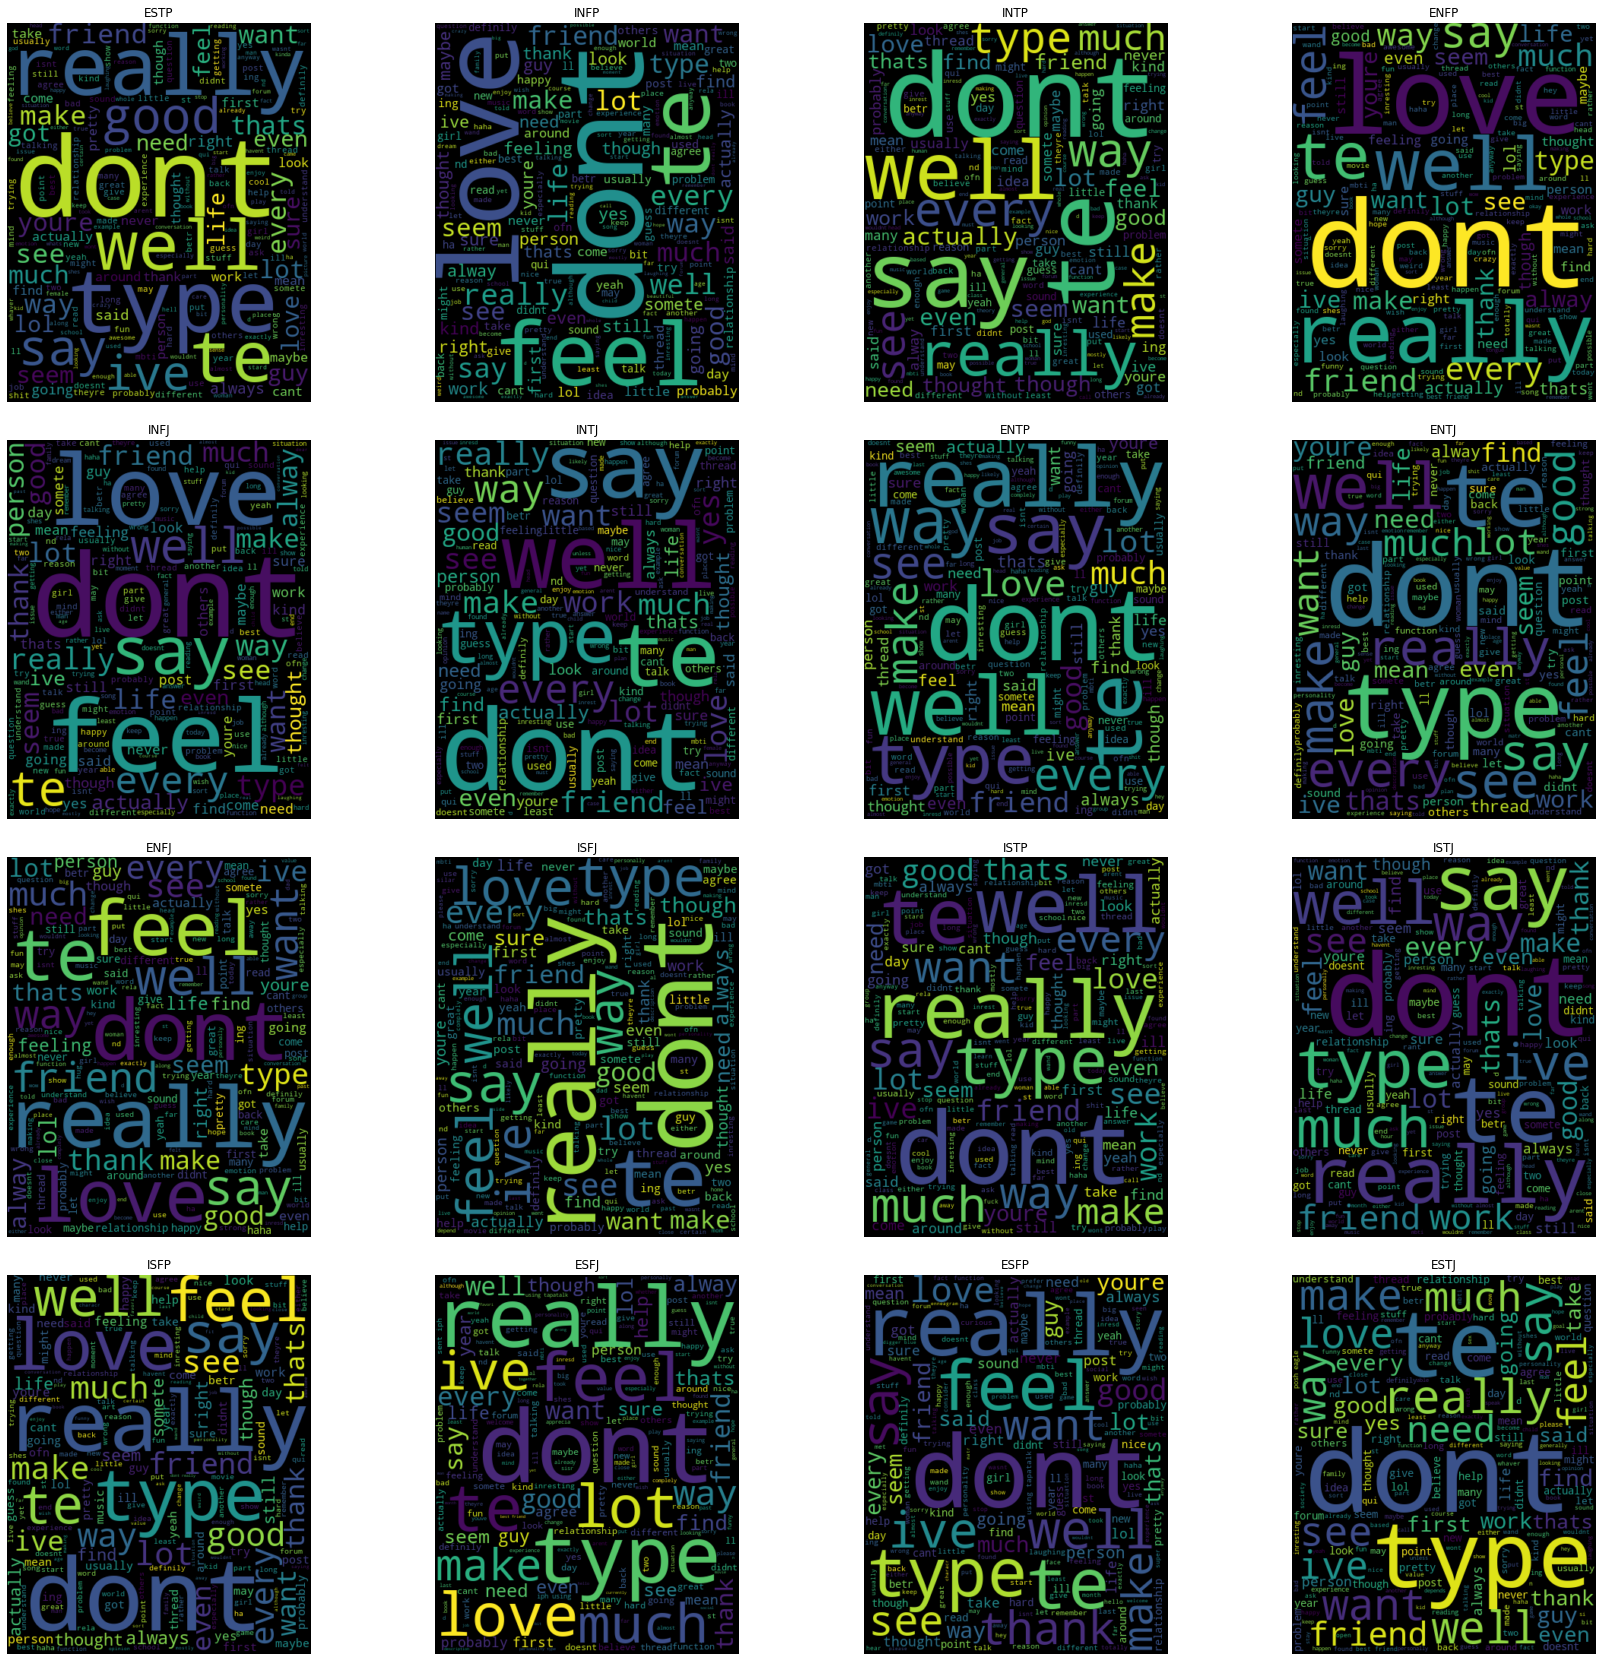

<IPython.core.display.Javascript object>

In [106]:
## Word CLouds

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(30, 30))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax.ravel()

for i, mbti in enumerate(train_df["type"].unique()):
    wordcloud_words = " ".join(
        [
            re.sub(r"(people)|(think)|(know)|(thing)|(one)|(te)|(im)", "", user_posts)
            for user_posts in train_df["cleaned_posts"].loc[train_df["type"] == mbti]
        ]
    )

    wordcloud = WordCloud(height=500).generate(wordcloud_words)
    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(mbti)

# plt.savefig(os.path.join(img_path, "wordcloud.png"))

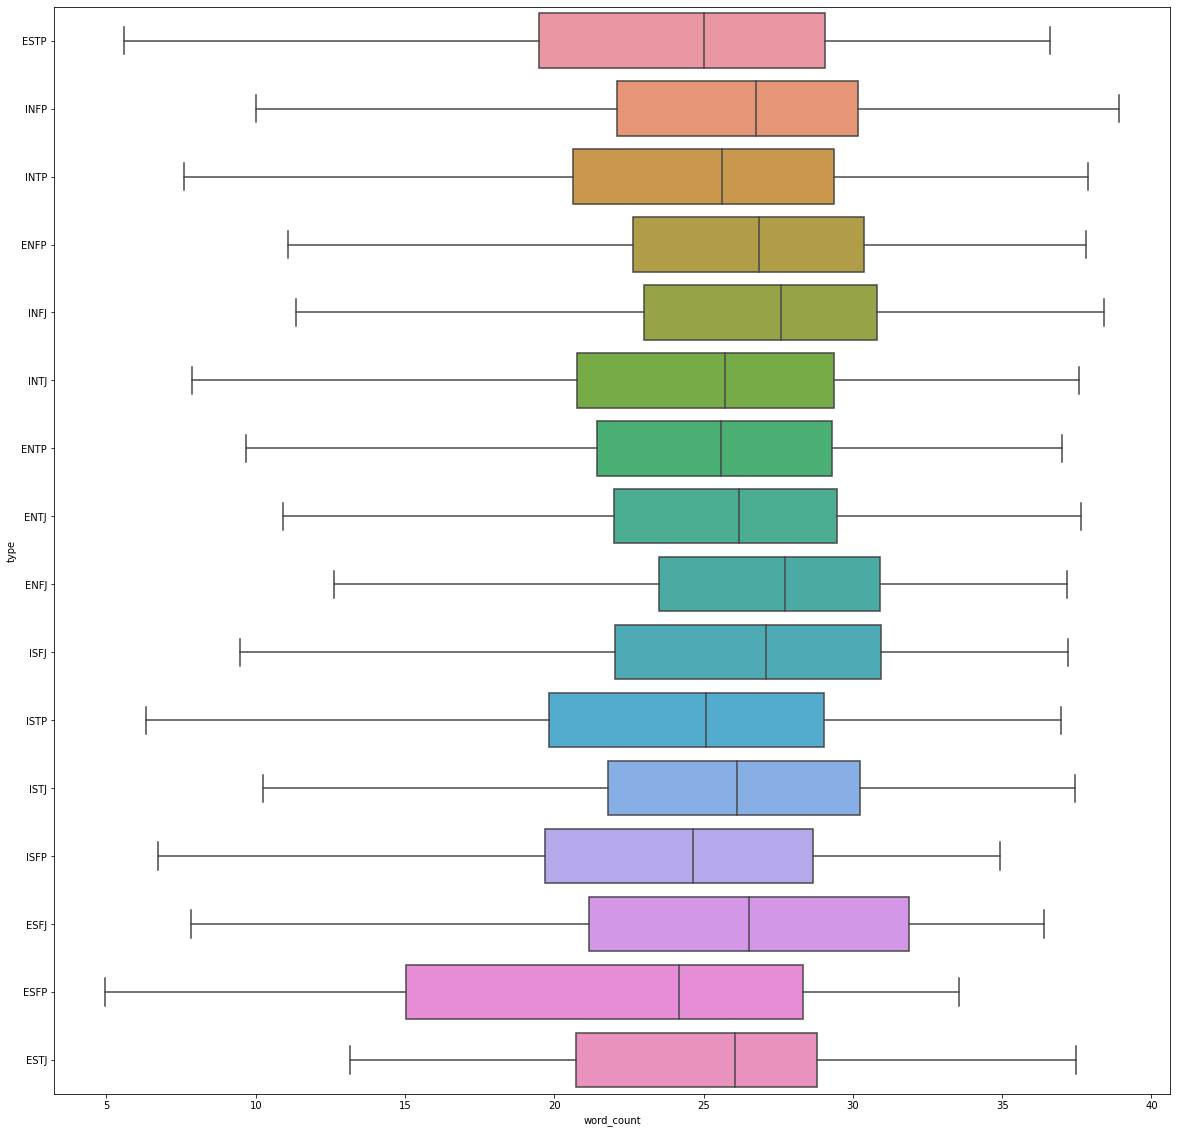

<IPython.core.display.Javascript object>

In [107]:
# boxplot of word counts
plt.figure(figsize=(20, 20))
sns.boxplot(y="type", x="word_count", data=train_df, showfliers=False)
# plt.savefig(os.path.join(img_path, "box_wordcount.png"))

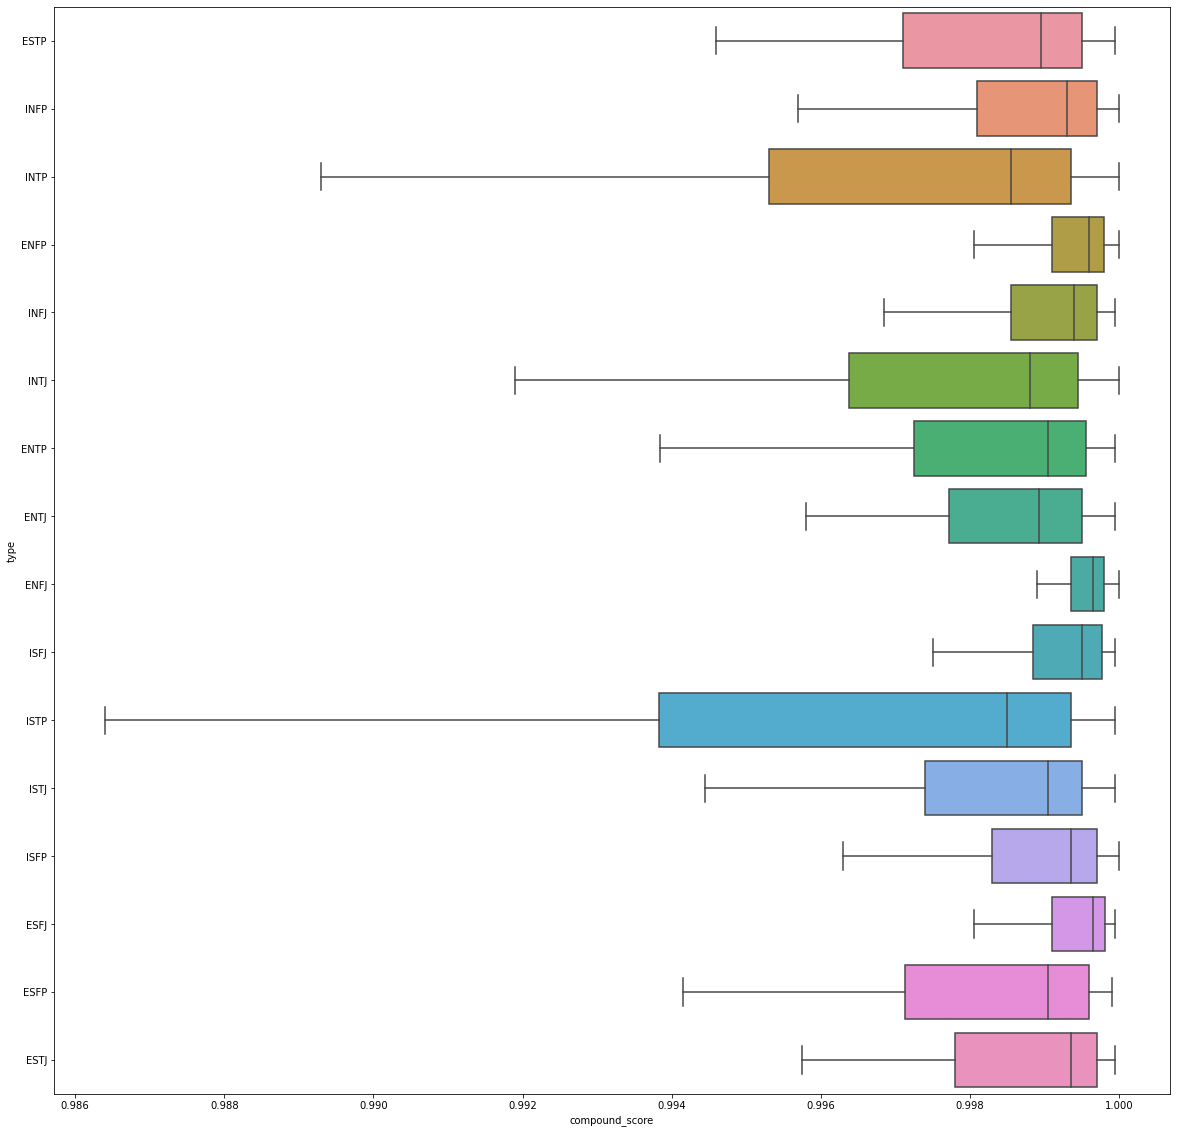

<IPython.core.display.Javascript object>

In [108]:
plt.figure(figsize=(20, 20))
sns.boxplot(y="type", x="compound_score", data=train_df, showfliers=False)

plt.show()

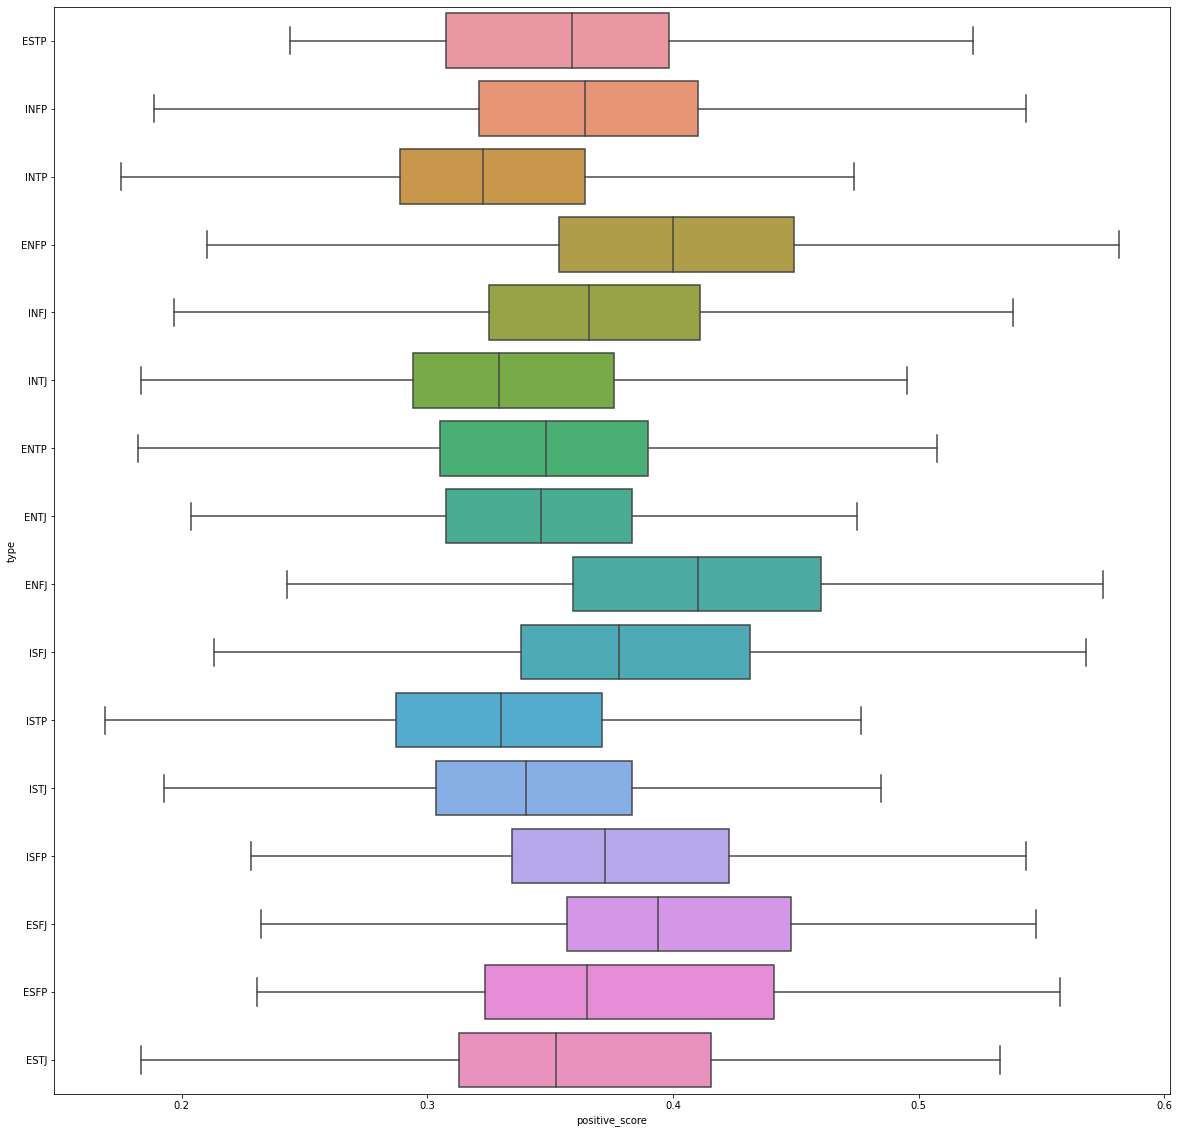

<IPython.core.display.Javascript object>

In [109]:
plt.figure(figsize=(20, 20))
sns.boxplot(y="type", x="positive_score", data=train_df, showfliers=False)
plt.show()

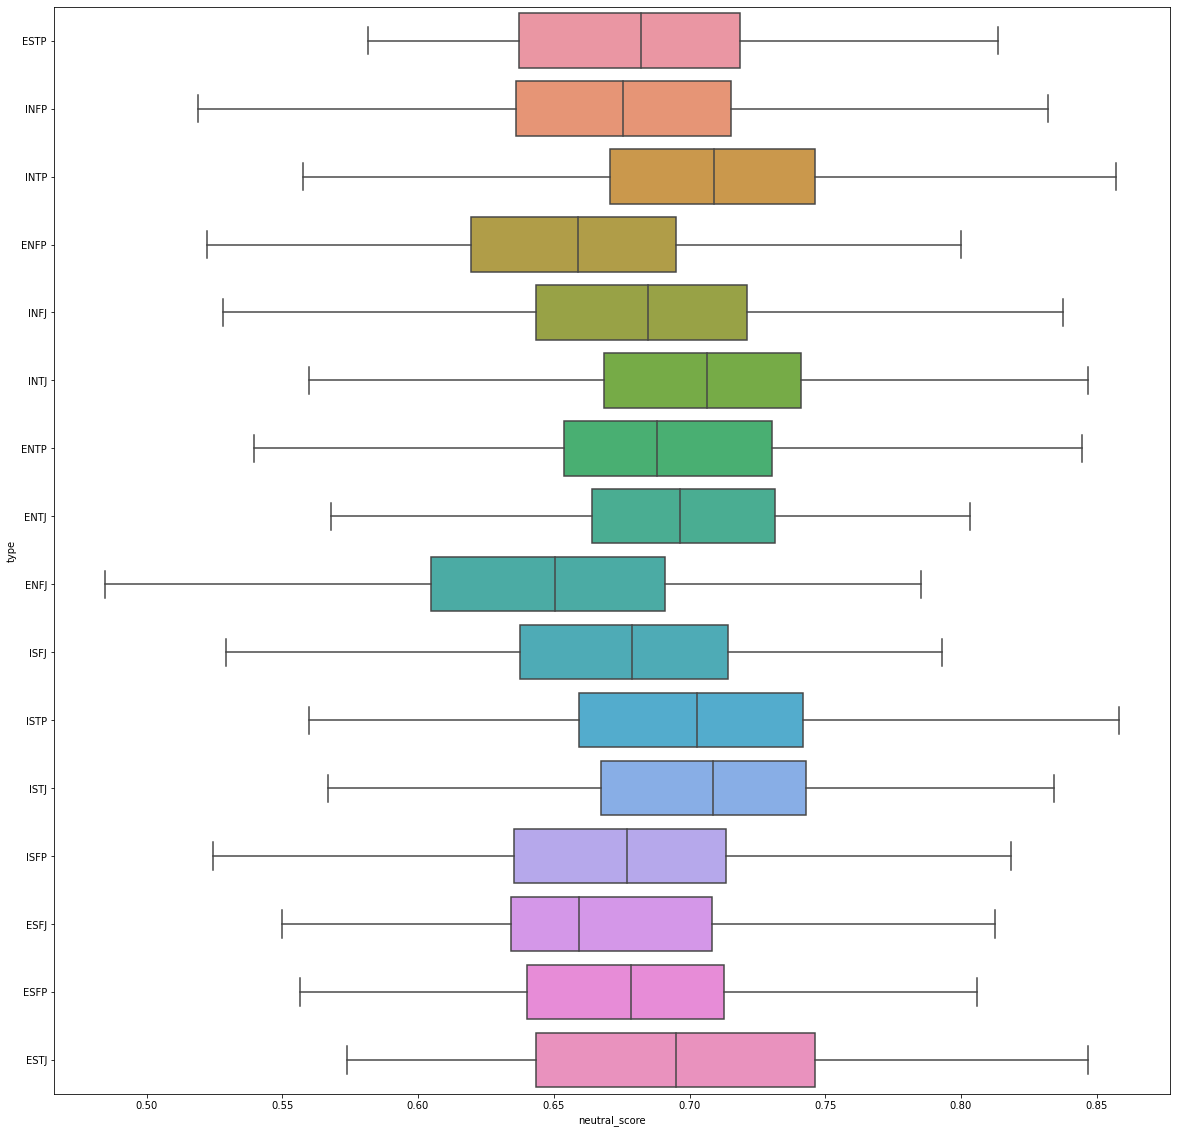

<IPython.core.display.Javascript object>

In [110]:
plt.figure(figsize=(20, 20))
sns.boxplot(y="type", x="neutral_score", data=train_df, showfliers=False)
plt.show()

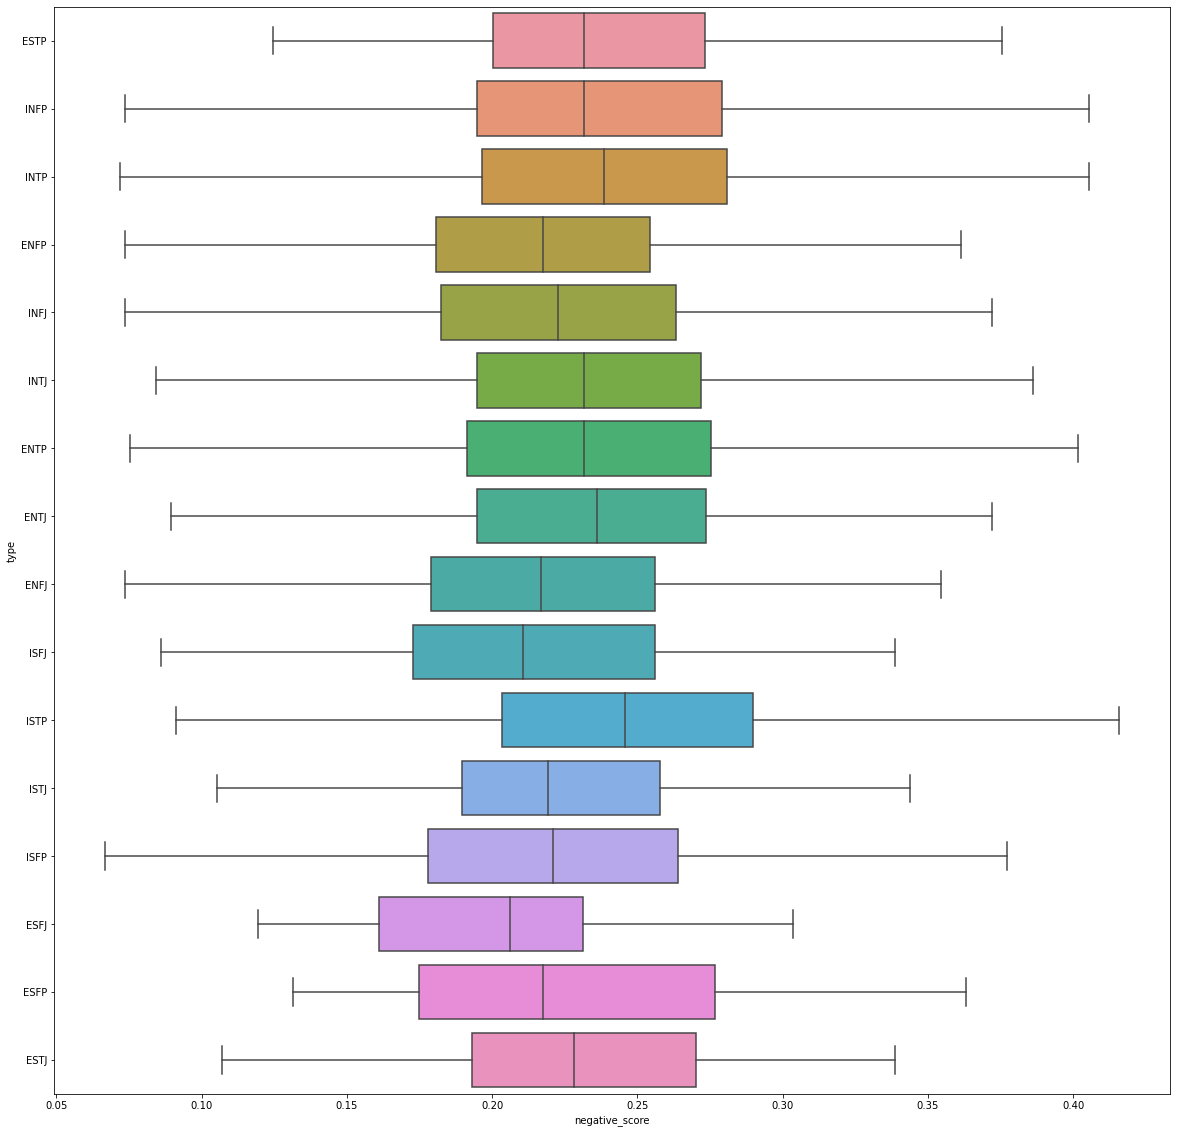

<IPython.core.display.Javascript object>

In [111]:
plt.figure(figsize=(20, 20))
sns.boxplot(y="type", x="negative_score", data=train_df, showfliers=False)
plt.show()

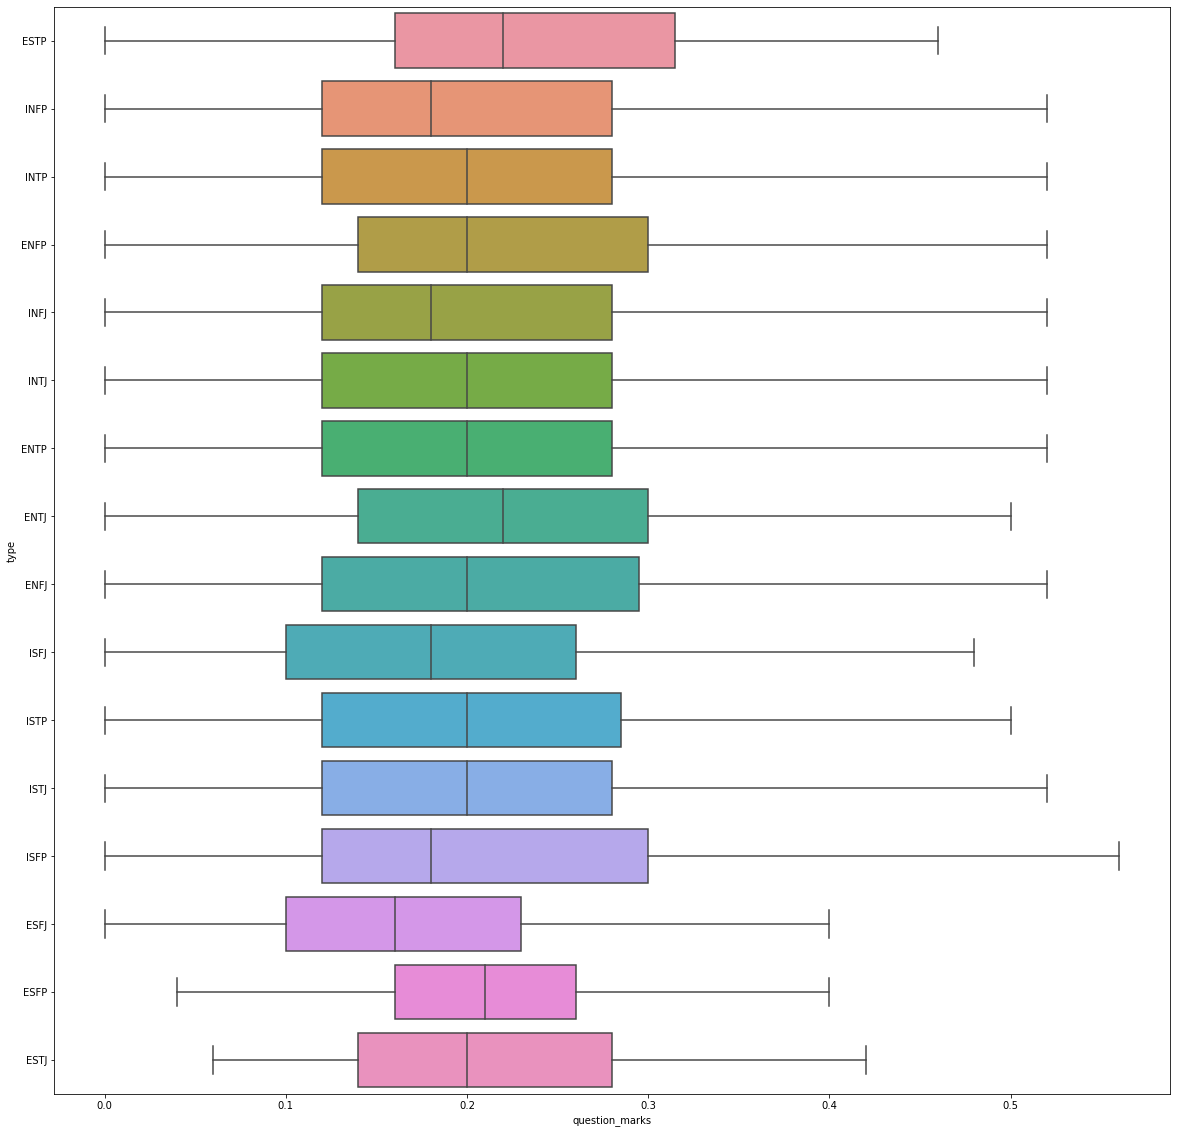

<IPython.core.display.Javascript object>

In [112]:
plt.figure(figsize=(20, 20))
sns.boxplot(y="type", x="question_marks", data=train_df, showfliers=False)
plt.show()

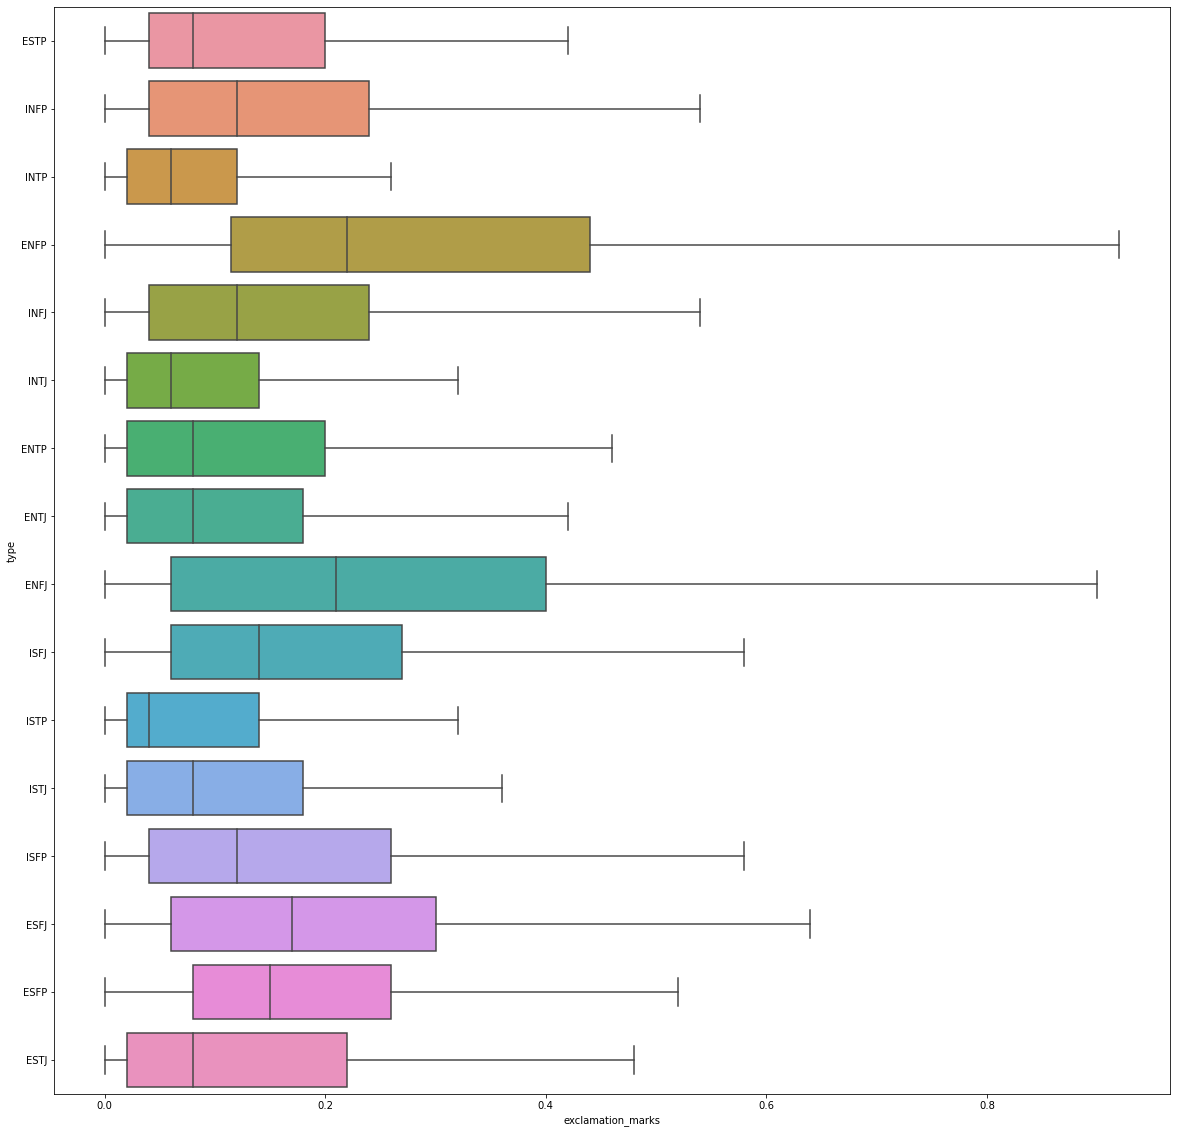

<IPython.core.display.Javascript object>

In [113]:
plt.figure(figsize=(20, 20))
sns.boxplot(y="type", x="exclamation_marks", data=train_df, showfliers=False)
plt.show()

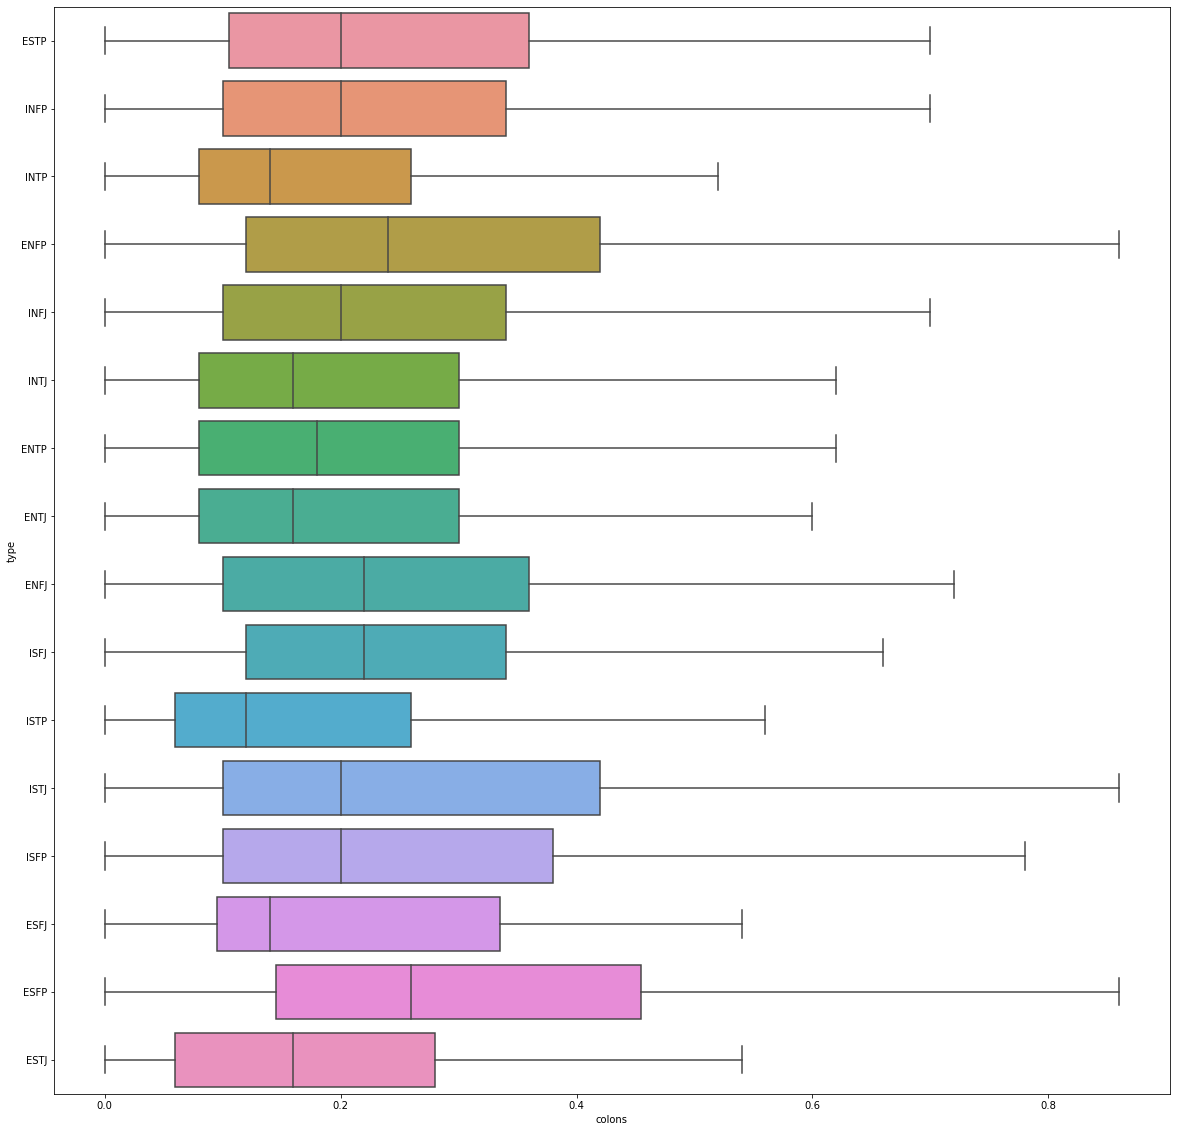

<IPython.core.display.Javascript object>

In [114]:
plt.figure(figsize=(20, 20))
sns.boxplot(y="type", x="colons", data=train_df, showfliers=False)
plt.show()

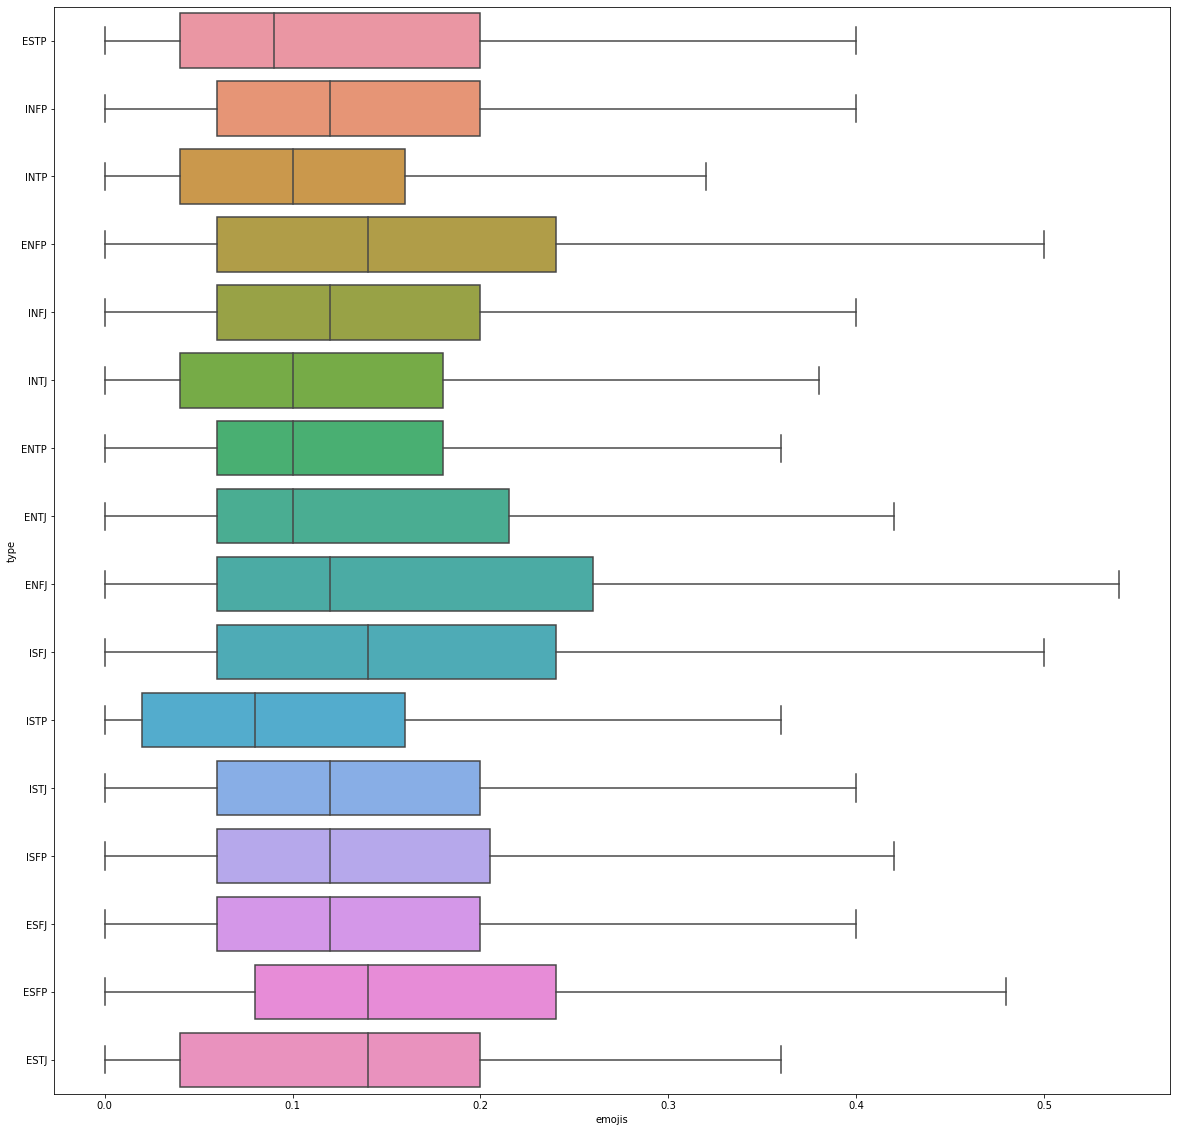

<IPython.core.display.Javascript object>

In [115]:
plt.figure(figsize=(20, 20))
sns.boxplot(y="type", x="emojis", data=train_df, showfliers=False)
plt.show()

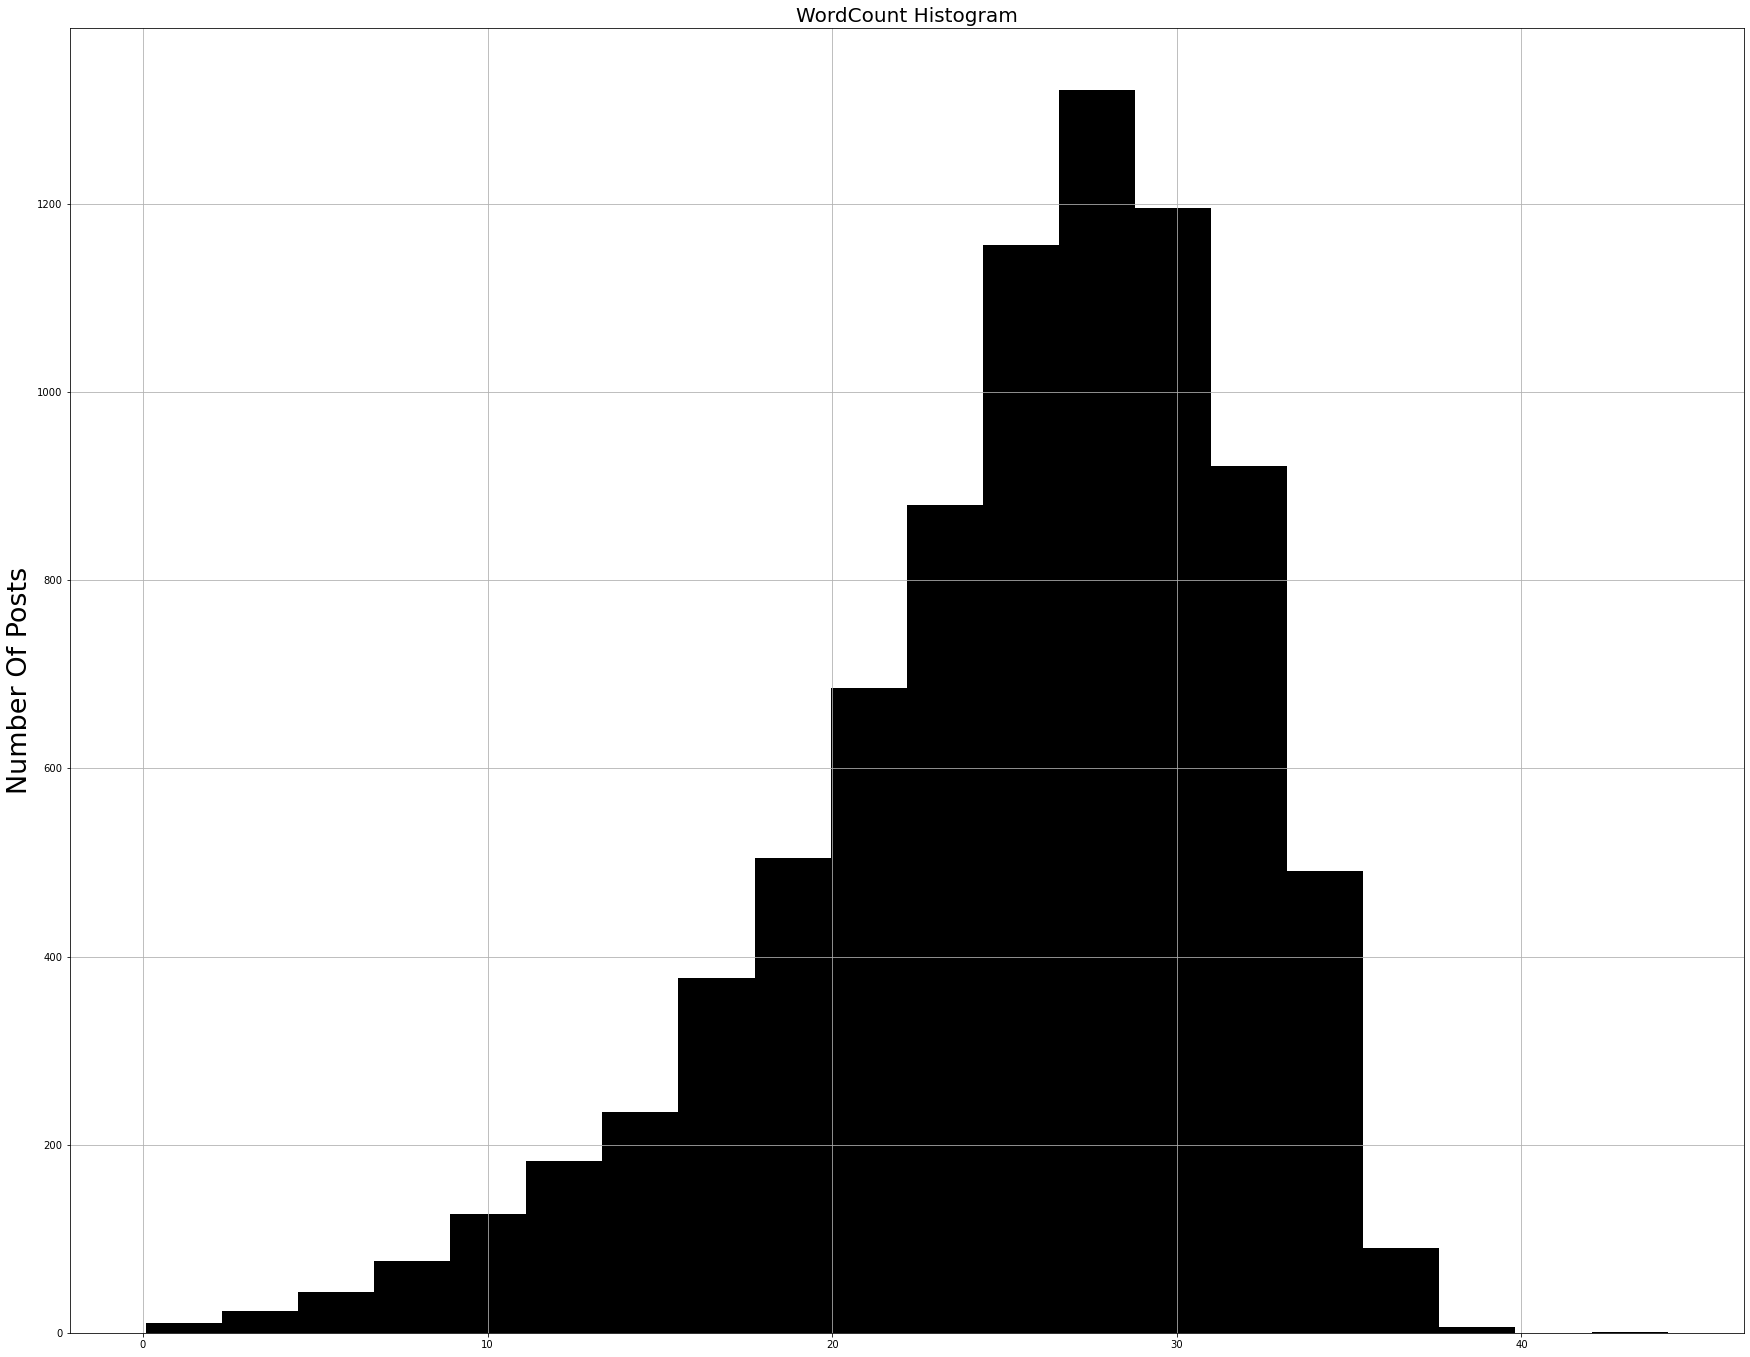

<IPython.core.display.Javascript object>

In [116]:
plt.figure(figsize=(30, 24))
plt.title("WordCount Histogram", fontsize=20)
plt.ylabel("Number Of Posts", fontsize=27)
train_df["word_count"].hist(bins=20, color="k")
# plt.savefig(os.path.join(img_path, "WordCount Histogram.png"))

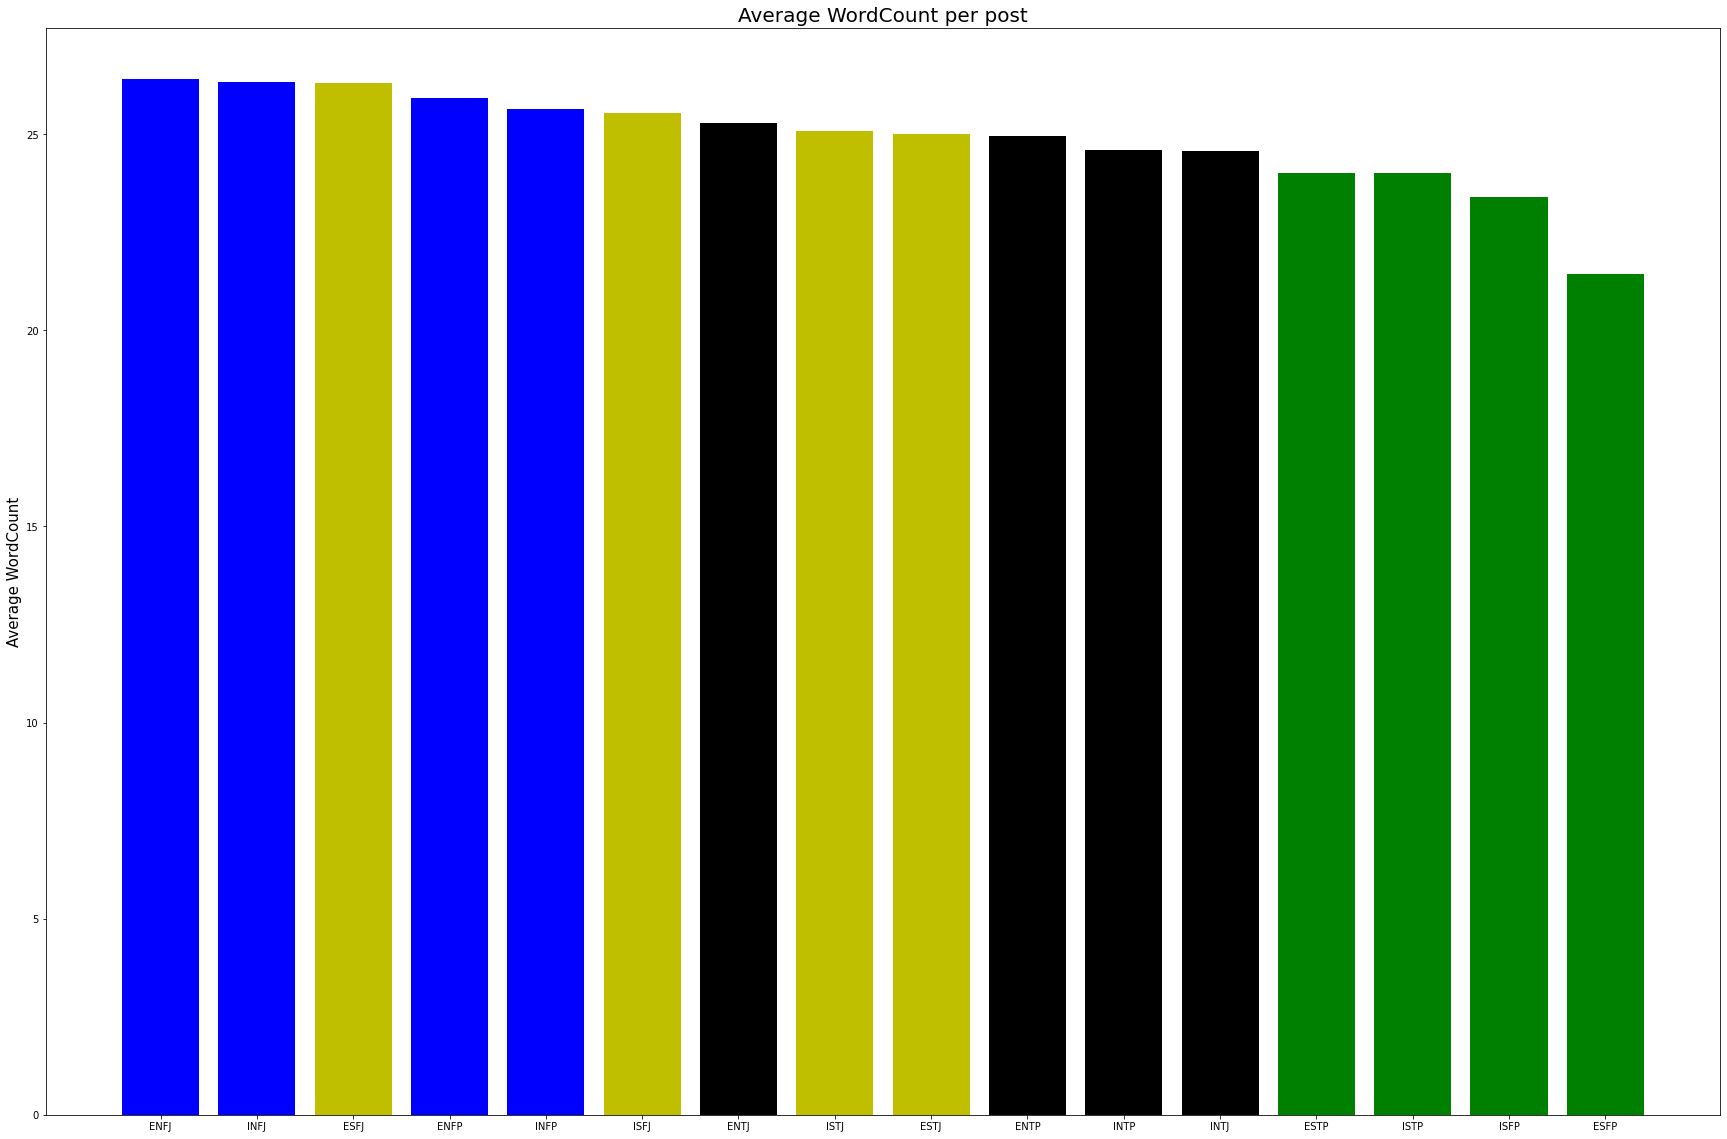

<IPython.core.display.Javascript object>

In [117]:
avg_words_type = (
    train_df.groupby("type")
    .agg({"word_count": "mean"})
    .sort_values("word_count", ascending=False)
)

colors = {x: colors_pallete[x] for x in avg_words_type.index.tolist()}
plt.figure(figsize=(30, 20))
plt.title("Average WordCount per post", fontsize=20)
plt.ylabel("Average WordCount", fontsize=15)
plt.bar(
    avg_words_type.index, avg_words_type["word_count"], color=list(colors.values()),
)
# plt.savefig(os.path.join(img_path, "Average WordCount per post.png"))

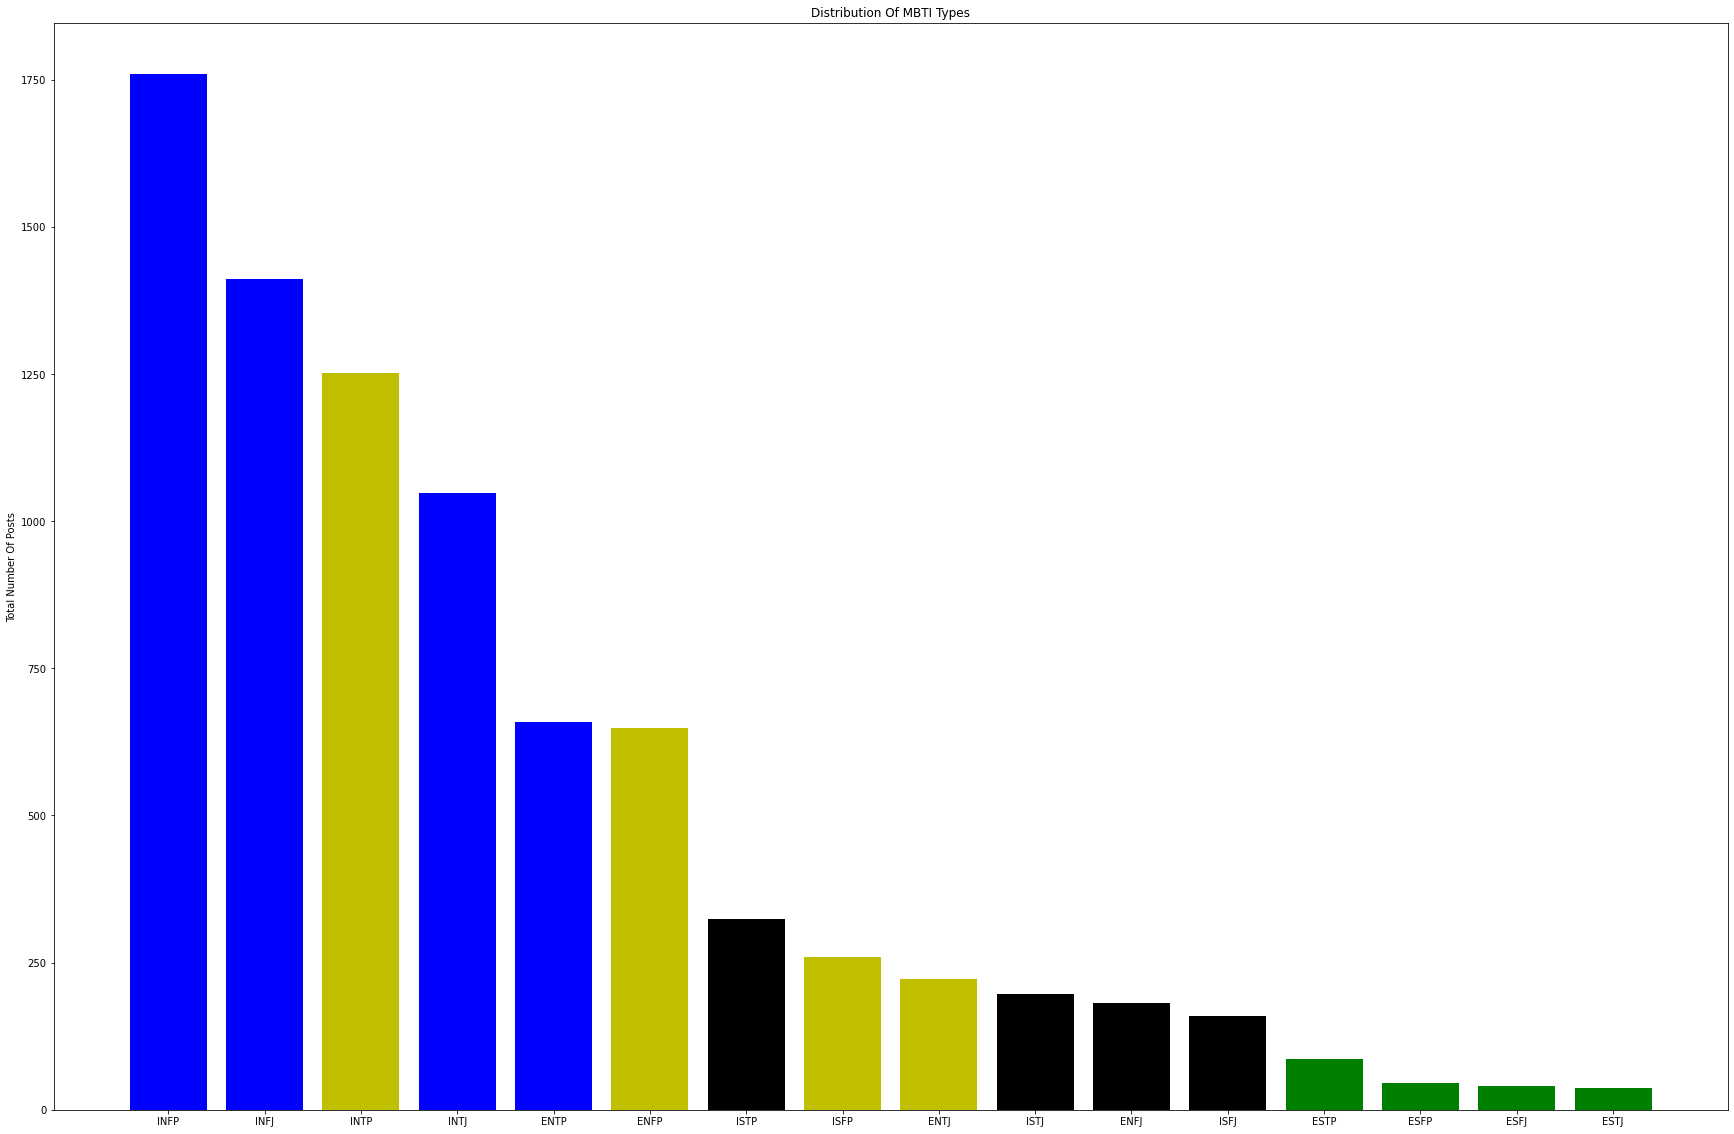

<IPython.core.display.Javascript object>

In [118]:
personality_types = (
    train_df.groupby("type")
    .agg({"type": "count"})
    .rename(columns={"type": "count"})
    .sort_values("count", ascending=False)
)
plt.figure(figsize=(30, 20))
plt.title("Distribution Of MBTI Types")
plt.ylabel("Total Number Of Posts")
plt.bar(
    personality_types.index, personality_types["count"], color=list(colors.values())
)
# plt.savefig(os.path.join(img_path, "Distribution Of MBTI Types.png"))

In [119]:
train_df.to_csv(os.path.join(".", "Myer Briggs Data", "train_df.csv"), index=False)

<IPython.core.display.Javascript object>

## Building ML models

In [128]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [129]:
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced

from sklearn.metrics import roc_auc_score

from sklearn.metrics import average_precision_score

from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegressionCV

from imblearn.pipeline import make_pipeline as imb_make_pipeline

<IPython.core.display.Javascript object>

In [135]:
# from sklearn.linear_model import

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

In [46]:
pd.options.display.max_seq_items = 500
train_df.columns

Index(['type', 'posts', 'is_Introvert', 'is_Intuitive', 'is_Feeling',
       'is_Perceptive', 'cleaned_posts', 'compound_score', 'neutral_score',
       'positive_score', 'negative_score', 'tag_post', 'word_tags',
       'POS_NNPS_mean', 'POS_NNPS_std.dev.', 'POS_JJ_mean', 'POS_JJ_std.dev.',
       'POS_:_mean', 'POS_:_std.dev.', 'POS_,_mean', 'POS_,_std.dev.',
       'POS_RBR_mean', 'POS_RBR_std.dev.', 'POS_IN_mean', 'POS_IN_std.dev.',
       'POS_NNS_mean', 'POS_NNS_std.dev.', 'POS_NNP_mean', 'POS_NNP_std.dev.',
       'POS_SYM_mean', 'POS_SYM_std.dev.', 'POS_RBS_mean', 'POS_RBS_std.dev.',
       'POS_WP$_mean', 'POS_WP$_std.dev.', 'POS_VB_mean', 'POS_VB_std.dev.',
       'POS_CC_mean', 'POS_CC_std.dev.', 'POS_VBN_mean', 'POS_VBN_std.dev.',
       'POS_(_mean', 'POS_(_std.dev.', 'POS_DT_mean', 'POS_DT_std.dev.',
       'POS_LS_mean', 'POS_LS_std.dev.', 'POS_CD_mean', 'POS_CD_std.dev.',
       'POS_TO_mean', 'POS_TO_std.dev.', 'POS_#_mean', 'POS_#_std.dev.',
       'POS_``_mean', 'POS

<IPython.core.display.Javascript object>

In [175]:
X = train_df[
    [
        "cleaned_posts",
        "compound_score",
        "ADJ_median",
        "ADP_median",
        "ADV_median",
        "CONJ_median",
        "DET_median",
        "NOUN_median",
        "NUM_median",
        "PRON_median",
        "VERB_median",
        "question_marks",
        "exclamation_marks",
        "emojis",
        "colons",
        "word_count",
        "unique_words",
        "uppercase_count",
        "link_count",
        "ellipsis_count",
        "image_counts",
    ]
]
y = train_df.iloc[:, 2:6]
print(X.shape)
print(y.shape)

(8328, 21)
(8328, 4)


<IPython.core.display.Javascript object>

In [69]:
X.columns

Index(['cleaned_posts', 'compound_score', 'ADJ_median', 'ADP_median',
       'ADV_median', 'CONJ_median', 'DET_median', 'NOUN_median', 'NUM_median',
       'PRON_median', 'VERB_median', 'question_marks', 'exclamation_marks',
       'emojis', 'colons', 'word_count', 'unique_words', 'uppercase_count',
       'link_count', 'ellipsis_count', 'image_counts'],
      dtype='object')

<IPython.core.display.Javascript object>

In [70]:
X

,cleaned_posts,compound_score,ADJ_median,ADP_median,ADV_median,CONJ_median,DET_median,NOUN_median,NUM_median,PRON_median,...,question_marks,exclamation_marks,emojis,colons,word_count,unique_words,uppercase_count,link_count,ellipsis_count,image_counts
0,cool together find eagle sexy wink holyshizzy ...,0.999550,1.0,0.0,0.5,1.0,1.0,2.5,0.0,1.5,...,0.12,0.04,0.08,0.68,12.50,6.88,0.52,0.14,0.16,0.00
1,forest supremely content ive attracted dark ...,0.999750,2.0,1.0,2.0,4.5,3.5,9.0,0.0,5.0,...,0.10,0.56,0.02,0.26,32.70,16.40,2.16,0.02,1.00,0.02
2,one favorite current least favorite friend ...,0.998750,2.0,0.5,2.5,6.0,2.0,8.0,0.0,4.0,...,0.12,0.00,0.08,0.08,32.28,15.76,1.54,0.02,0.70,0.00
3,rarely make art mostly export imaginative conc...,0.999750,3.0,1.0,3.5,5.0,3.0,7.0,0.0,4.0,...,0.20,0.02,0.14,0.18,33.28,15.76,1.88,0.00,0.92,0.00
4,respect opinion dont really know honest hurt e...,0.999350,2.5,1.0,3.0,5.0,3.0,6.0,0.0,5.0,...,0.10,0.04,0.02,0.02,31.18,13.52,2.06,0.00,0.60,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,bullshit never consistently lol im actually go...,0.998750,2.0,1.0,3.0,4.0,2.0,6.0,0.0,5.0,...,0.08,0.22,0.20,0.24,27.70,13.44,1.86,0.04,0.62,0.00
8324,youre gonna hafta knock door becauase never le...,0.996799,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.5,...,0.14,0.02,0.02,0.10,7.00,4.56,0.14,0.34,0.04,0.30
8325,spreefirit warm greeting insert picture cute ...,0.999850,3.0,1.0,3.0,4.0,3.0,6.0,0.0,4.0,...,0.50,0.86,0.46,0.74,30.34,13.76,1.82,0.00,0.96,0.00
8326,agreed party much often clingee rather clinger...,0.999250,2.0,1.0,3.0,4.0,3.0,6.0,0.0,4.0,...,0.28,0.16,0.34,0.34,29.70,15.06,1.40,0.00,0.88,0.00


<IPython.core.display.Javascript object>

In [49]:
y

,is_Introvert,is_Intuitive,is_Feeling,is_Perceptive
0,0,0,0,1
1,1,1,1,1
2,1,1,0,1
3,0,1,1,1
4,1,1,1,0
...,...,...,...,...
8323,1,1,1,0
8324,1,1,0,1
8325,0,1,1,1
8326,1,1,1,1


<IPython.core.display.Javascript object>

In [137]:
additional_stopwords =[
        "im",
        "hey",
        "hello",
        "briggs",
        "cat",
        "car",
        "mbti",
        "soup",
        "tea",
        "sport",
        "snow",
        "christmas",
        "te"
    ]


<IPython.core.display.Javascript object>

In [138]:
n_score_counts = [
    "compound_score",
    "ADJ_median",
    "ADP_median",
    "ADV_median",
    "CONJ_median",
    "DET_median",
    "NOUN_median",
    "NUM_median",
    "PRON_median",
    "VERB_median",
    "question_marks",
    "exclamation_marks",
    "emojis",
    "colons",
    "word_count",
    "unique_words",
    "uppercase_count",
    "link_count",
    "ellipsis_count",
    "image_counts"]

# selecting k - best features from other than cleaned posts
best_k_features = make_pipeline(MinMaxScaler(), SelectKBest(f_classif, k=10))

# preprocessing for TF-IDF vectorizer
preprocessor_tf = ColumnTransformer(
    transformers=[
        (
            "tfidf",
            TfidfVectorizer(min_df=25, max_df=0.8, stop_words=additional_stopwords),
            "cleaned_posts",
        ),
        ("selectbest", best_k_features, n_score_counts),
    ],
    remainder="passthrough",
)

# preprocessing for Count vectorizer
preprocessor_count = ColumnTransformer(
    transformers=[
        (
            "ct_vect",
            CountVectorizer(min_df=25, max_df=0.8, stop_words=additional_stopwords),
            "cleaned_posts",
        ),
        ("selectbest", best_k_features, n_score_counts),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

In [139]:
mbti_index = {
    "is_Introvert": "Introvert vs Extrovert",
    "is_Intuitive": "Intuition vs Sensing",
    "is_Feeling": "Feeling vs Thinking",
    "is_Perceptive": "Perception vs Judging",
}


def build_model(X, y, model, vectorizer_preprocessor):

    for col in y.columns:
        print("\n", mbti_index[col], sep="")
        target = y[col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, target, test_size=0.2, stratify=target
        )

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        precision_avg = average_precision_score(y_test, y_prob)

        # model_evaluation
        print(
            f"Geometric Mean Score : {geometric_mean_score(y_test, y_pred, average = 'weighted') : .2f}"
        )
        print(f"ROC-AUC Score : {roc_auc_score(y_test, y_prob):.2f}")
        print(f"Average Precision Score : {precision_avg:.2f}")
        print(classification_report_imbalanced(y_test, y_pred))

<IPython.core.display.Javascript object>

### TF-IDF Logistic Regression

In [140]:
tfidf_logistic_regression = imb_make_pipeline(
    preprocessor_tf, RandomUnderSampler(), LogisticRegressionCV(max_iter=500)
)
build_model(X, y, tfidf_logistic_regression, "tfidf")


Introvert vs Extrovert
Geometric Mean Score :  0.69
ROC-AUC Score : 0.76
Average Precision Score : 0.91
                   pre       rec       spe        f1       geo       iba       sup

          0       0.40      0.70      0.68      0.51      0.69      0.48       384
          1       0.88      0.68      0.70      0.77      0.69      0.48      1282

avg / total       0.77      0.69      0.69      0.71      0.69      0.48      1666


Intuition vs Sensing
Geometric Mean Score :  0.69
ROC-AUC Score : 0.75
Average Precision Score : 0.94
                   pre       rec       spe        f1       geo       iba       sup

          0       0.26      0.71      0.67      0.38      0.69      0.48       230
          1       0.94      0.67      0.71      0.78      0.69      0.48      1436

avg / total       0.84      0.68      0.70      0.73      0.69      0.48      1666


Feeling vs Thinking
Geometric Mean Score :  0.79
ROC-AUC Score : 0.88
Average Precision Score : 0.90
                   p

<IPython.core.display.Javascript object>

### Count Logistic Regression

In [75]:
count_logistic_regression = imb_make_pipeline(
    preprocessor_count, RandomUnderSampler(), LogisticRegressionCV(max_iter=500)
)
build_model(X, y, count_logistic_regression, "count")


Introvert vs Extrovert
Geometric Mean Score :  0.66
ROC-AUC Score : 0.71
Average Precision Score : 0.88
                   pre       rec       spe        f1       geo       iba       sup

          0       0.38      0.62      0.69      0.47      0.66      0.43       384
          1       0.86      0.69      0.62      0.77      0.66      0.43      1282

avg / total       0.75      0.68      0.64      0.70      0.66      0.43      1666


Intuition vs Sensing
Geometric Mean Score :  0.67
ROC-AUC Score : 0.73
Average Precision Score : 0.94
                   pre       rec       spe        f1       geo       iba       sup

          0       0.24      0.70      0.64      0.35      0.67      0.45       230
          1       0.93      0.64      0.70      0.76      0.67      0.44      1436

avg / total       0.83      0.65      0.69      0.70      0.67      0.45      1666


Feeling vs Thinking
Geometric Mean Score :  0.80
ROC-AUC Score : 0.88
Average Precision Score : 0.89
                   p

<IPython.core.display.Javascript object>

### TF-IDF Logistic Lasso

In [86]:
tfidf_logistic_lasso = imb_make_pipeline(
    preprocessor_tf,
    RandomUnderSampler(),
    LogisticRegressionCV(penalty="l1", solver="liblinear", max_iter=1000),
)
build_model(X, y, tfidf_logistic_lasso, "tfidf")


Introvert vs Extrovert
Geometric Mean Score :  0.69
ROC-AUC Score : 0.76
Average Precision Score : 0.90
                   pre       rec       spe        f1       geo       iba       sup

          0       0.40      0.68      0.69      0.50      0.69      0.47       384
          1       0.88      0.69      0.68      0.77      0.69      0.47      1282

avg / total       0.77      0.69      0.69      0.71      0.69      0.47      1666


Intuition vs Sensing
Geometric Mean Score :  0.68
ROC-AUC Score : 0.73
Average Precision Score : 0.94
                   pre       rec       spe        f1       geo       iba       sup

          0       0.24      0.73      0.62      0.36      0.68      0.46       230
          1       0.94      0.62      0.73      0.75      0.68      0.45      1436

avg / total       0.84      0.64      0.72      0.69      0.68      0.45      1666


Feeling vs Thinking
Geometric Mean Score :  0.76
ROC-AUC Score : 0.84
Average Precision Score : 0.85
                   p

<IPython.core.display.Javascript object>

### Count Logistic Lasso

In [89]:
count_logistic_lasso = imb_make_pipeline(
    preprocessor_count,
    RandomUnderSampler(),
    LogisticRegressionCV(penalty="l1", solver="liblinear", max_iter=1000),
)
build_model(X, y, count_logistic_lasso, "count")


Introvert vs Extrovert
Geometric Mean Score :  0.65
ROC-AUC Score : 0.71
Average Precision Score : 0.88
                   pre       rec       spe        f1       geo       iba       sup

          0       0.35      0.66      0.64      0.46      0.65      0.42       384
          1       0.86      0.64      0.66      0.73      0.65      0.42      1282

avg / total       0.75      0.64      0.66      0.67      0.65      0.42      1666


Intuition vs Sensing
Geometric Mean Score :  0.65
ROC-AUC Score : 0.70
Average Precision Score : 0.92
                   pre       rec       spe        f1       geo       iba       sup

          0       0.23      0.64      0.65      0.34      0.65      0.42       230
          1       0.92      0.65      0.64      0.76      0.65      0.42      1436

avg / total       0.82      0.65      0.65      0.71      0.65      0.42      1666


Feeling vs Thinking
Geometric Mean Score :  0.77
ROC-AUC Score : 0.85
Average Precision Score : 0.87
                   p

<IPython.core.display.Javascript object>

### TF-IDF Logistic Ridge

In [85]:
tfidf_logistic_ridge = imb_make_pipeline(
    preprocessor_tf,
    RandomUnderSampler(),
    LogisticRegressionCV(penalty="l2", max_iter=500),
)
build_model(X, y, tfidf_logistic_ridge, "tfidf")


Introvert vs Extrovert
Geometric Mean Score :  0.69
ROC-AUC Score : 0.75
Average Precision Score : 0.90
                   pre       rec       spe        f1       geo       iba       sup

          0       0.40      0.69      0.69      0.50      0.69      0.47       384
          1       0.88      0.69      0.69      0.77      0.69      0.47      1282

avg / total       0.77      0.69      0.69      0.71      0.69      0.47      1666


Intuition vs Sensing
Geometric Mean Score :  0.67
ROC-AUC Score : 0.73
Average Precision Score : 0.94
                   pre       rec       spe        f1       geo       iba       sup

          0       0.25      0.66      0.68      0.36      0.67      0.45       230
          1       0.93      0.68      0.66      0.79      0.67      0.45      1436

avg / total       0.83      0.68      0.66      0.73      0.67      0.45      1666


Feeling vs Thinking
Geometric Mean Score :  0.80
ROC-AUC Score : 0.88
Average Precision Score : 0.90
                   p

<IPython.core.display.Javascript object>

### Count Logistic Ridge

In [91]:
count_logistic_ridge = imb_make_pipeline(
    preprocessor_count,
    RandomUnderSampler(),
    LogisticRegressionCV(penalty="l2", max_iter=500),
)
build_model(X, y, count_logistic_ridge, "count")


Introvert vs Extrovert
Geometric Mean Score :  0.67
ROC-AUC Score : 0.73
Average Precision Score : 0.90
                   pre       rec       spe        f1       geo       iba       sup

          0       0.38      0.64      0.69      0.48      0.67      0.44       384
          1       0.87      0.69      0.64      0.77      0.67      0.45      1282

avg / total       0.76      0.68      0.65      0.70      0.67      0.45      1666


Intuition vs Sensing
Geometric Mean Score :  0.66
ROC-AUC Score : 0.71
Average Precision Score : 0.93
                   pre       rec       spe        f1       geo       iba       sup

          0       0.24      0.67      0.66      0.35      0.66      0.44       230
          1       0.93      0.66      0.67      0.77      0.66      0.44      1436

avg / total       0.83      0.66      0.67      0.71      0.66      0.44      1666


Feeling vs Thinking
Geometric Mean Score :  0.77
ROC-AUC Score : 0.85
Average Precision Score : 0.87
                   p

<IPython.core.display.Javascript object>

In [94]:
class DenseTransformer:
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

<IPython.core.display.Javascript object>

### TF-IDF Naive Bayes

In [95]:
tfidf_naive_bayes = imb_make_pipeline(
    preprocessor_tf, DenseTransformer(), RandomUnderSampler(), MultinomialNB()
)
build_model(X, y, tfidf_naive_bayes, "tfidf")


Introvert vs Extrovert
Geometric Mean Score :  0.68
ROC-AUC Score : 0.73
Average Precision Score : 0.90
                   pre       rec       spe        f1       geo       iba       sup

          0       0.36      0.75      0.61      0.49      0.67      0.46       384
          1       0.89      0.61      0.75      0.72      0.67      0.45      1282

avg / total       0.77      0.64      0.72      0.67      0.67      0.45      1666


Intuition vs Sensing
Geometric Mean Score :  0.72
ROC-AUC Score : 0.78
Average Precision Score : 0.95
                   pre       rec       spe        f1       geo       iba       sup

          0       0.28      0.73      0.70      0.41      0.72      0.51       230
          1       0.94      0.70      0.73      0.80      0.72      0.51      1436

avg / total       0.85      0.71      0.73      0.75      0.72      0.51      1666


Feeling vs Thinking
Geometric Mean Score :  0.77
ROC-AUC Score : 0.84
Average Precision Score : 0.86
                   p

<IPython.core.display.Javascript object>

### Count Naive Bayes

In [96]:
count_naive_bayes = imb_make_pipeline(
    preprocessor_count, DenseTransformer(), RandomUnderSampler(), MultinomialNB()
)
build_model(X, y, count_naive_bayes, "count")


Introvert vs Extrovert
Geometric Mean Score :  0.68
ROC-AUC Score : 0.74
Average Precision Score : 0.90
                   pre       rec       spe        f1       geo       iba       sup

          0       0.39      0.67      0.68      0.49      0.68      0.46       384
          1       0.87      0.68      0.67      0.77      0.68      0.46      1282

avg / total       0.76      0.68      0.67      0.70      0.68      0.46      1666


Intuition vs Sensing
Geometric Mean Score :  0.68
ROC-AUC Score : 0.73
Average Precision Score : 0.94
                   pre       rec       spe        f1       geo       iba       sup

          0       0.24      0.72      0.64      0.36      0.68      0.46       230
          1       0.93      0.64      0.72      0.76      0.68      0.46      1436

avg / total       0.84      0.65      0.71      0.70      0.68      0.46      1666


Feeling vs Thinking
Geometric Mean Score :  0.76
ROC-AUC Score : 0.83
Average Precision Score : 0.85
                   p

<IPython.core.display.Javascript object>

### TF-IDF Random Forest

In [98]:
tfidf_random_forest = imb_make_pipeline(
    preprocessor_tf,
    DenseTransformer(),
    RandomUnderSampler(),
    RandomForestClassifier(n_estimators=500),
)
build_model(X, y, tfidf_random_forest, "tfidf")


Introvert vs Extrovert
Geometric Mean Score :  0.65
ROC-AUC Score : 0.72
Average Precision Score : 0.89
                   pre       rec       spe        f1       geo       iba       sup

          0       0.35      0.68      0.63      0.47      0.65      0.43       384
          1       0.87      0.63      0.68      0.73      0.65      0.43      1282

avg / total       0.75      0.64      0.67      0.67      0.65      0.43      1666


Intuition vs Sensing
Geometric Mean Score :  0.62
ROC-AUC Score : 0.67
Average Precision Score : 0.92
                   pre       rec       spe        f1       geo       iba       sup

          0       0.21      0.59      0.66      0.31      0.62      0.38       230
          1       0.91      0.66      0.59      0.76      0.62      0.39      1436

avg / total       0.81      0.65      0.60      0.70      0.62      0.39      1666


Feeling vs Thinking
Geometric Mean Score :  0.74
ROC-AUC Score : 0.82
Average Precision Score : 0.83
                   p

<IPython.core.display.Javascript object>

### Count Random Forest

In [99]:
count_random_forest = imb_make_pipeline(
    preprocessor_count,
    DenseTransformer(),
    RandomUnderSampler(),
    RandomForestClassifier(n_estimators=500),
)
build_model(X, y, count_random_forest, "count")


Introvert vs Extrovert
Geometric Mean Score :  0.71
ROC-AUC Score : 0.76
Average Precision Score : 0.90
                   pre       rec       spe        f1       geo       iba       sup

          0       0.40      0.75      0.67      0.52      0.71      0.50       384
          1       0.90      0.67      0.75      0.77      0.71      0.50      1282

avg / total       0.78      0.69      0.73      0.71      0.71      0.50      1666


Intuition vs Sensing
Geometric Mean Score :  0.63
ROC-AUC Score : 0.68
Average Precision Score : 0.93
                   pre       rec       spe        f1       geo       iba       sup

          0       0.23      0.56      0.69      0.32      0.62      0.38       230
          1       0.91      0.69      0.56      0.79      0.62      0.39      1436

avg / total       0.81      0.68      0.58      0.72      0.62      0.39      1666


Feeling vs Thinking
Geometric Mean Score :  0.78
ROC-AUC Score : 0.85
Average Precision Score : 0.87
                   p

<IPython.core.display.Javascript object>

## Final Model

In [125]:
# pip install joblib

ERROR:root:Cannot parse: 1:4: pip install joblib
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "D:\Anaconda\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "D:\Anaconda\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "D:\Anaconda\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [126]:
from joblib import dump

<IPython.core.display.Javascript object>


Introvert vs Extrovert
               coef
word               
fun       -3.495435
bored     -3.018888
world      2.539989
boring    -2.506765
guy       -2.482701
dream      2.425452
alot      -2.419567
shit      -2.412494
dry        2.361802
new       -2.346841
sometimes  2.336961
mind       2.261350
ego       -2.255259
debate    -2.249221
found      2.227438
business  -2.217774
mother     2.198821
nature     2.148235
challenge -2.141333
totally   -2.119463
awesome   -2.107601

Intuition vs Sensing
                coef
word                
type       -3.114029
rant       -2.935548
world       2.732483
human       2.576746
pretty     -2.301848
idea        2.227667
rave       -2.134419
dark        2.116098
husband    -2.110202
dominant   -2.024347
sensor     -2.019037
sound      -1.986908
ill        -1.972947
need       -1.957310
yet         1.938247
lost        1.904868
stuff      -1.881233
social      1.850367
usually    -1.839617
perc       -1.824203
stereotype -1.816953

Feeling vs

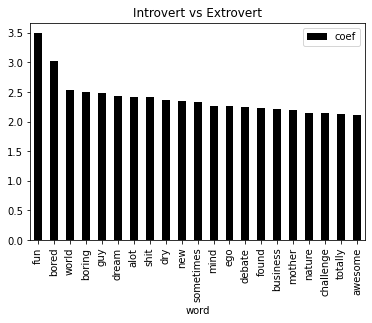

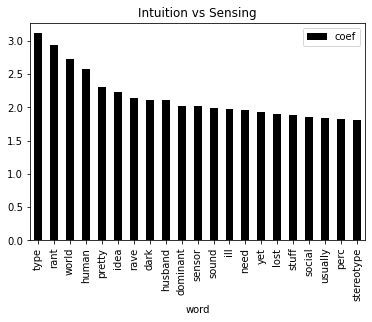

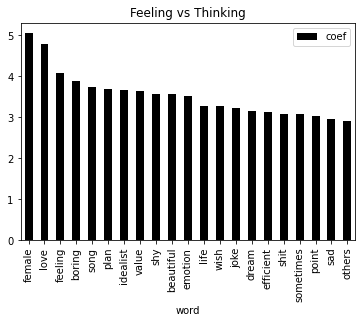

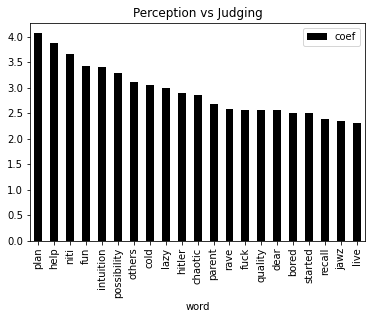

<IPython.core.display.Javascript object>

In [141]:
for col in y.columns:
    print(f"\n{mbti_index[col]}")
    target = y[col]

    tfidf_logistic_regression = imb_make_pipeline(
        preprocessor_tf, RandomUnderSampler(), LogisticRegressionCV(max_iter=500)
    )

    tfidf_logistic_regression.fit(X, target)

    # feature importance
    coef = tfidf_logistic_regression[-1].coef_[0]
    words = (
        tfidf_logistic_regression[0]
        .named_transformers_["tfidf"]
        .get_feature_names_out()
    )
    words_list = list(zip(words, coef))
    result_df = pd.DataFrame(words_list, columns=["word", "coef"]).set_index("word")
    result_df = result_df.reindex(
        result_df.coef.abs().sort_values(ascending=False).index
    )[:21]
    print(result_df)

    # plots
    result_df.loc[:, "coef"] = result_df["coef"].apply(lambda x: abs(x))
    result_df.loc[:, "coef"] = result_df.sort_values("coef")
    result_df.plot(kind="bar", color="k", title=mbti_index[col])

    ## saving the model
    dump(tfidf_logistic_regression, f"{col}_model.joblib")

## Testing the final model on test df

In [142]:
from joblib import load

<IPython.core.display.Javascript object>

In [150]:
from sklearn.metrics import accuracy_score

<IPython.core.display.Javascript object>

In [164]:
def categorize_types(data):
    data.loc[:, "is_Introvert"] = data["type"].apply(lambda x: 1 if x[0] == "I" else 0)
    data.loc[:, "is_Intuitive"] = data["type"].apply(lambda x: 1 if x[1] == "N" else 0)
    data.loc[:, "is_Feeling"] = data["type"].apply(lambda x: 1 if x[2] == "F" else 0)
    data.loc[:, "is_Perceptive"] = data["type"].apply(lambda x: 1 if x[3] == "P" else 0)


def cleansing_posts(data):

    data.loc[:, "cleaned_posts"] = data["posts"].str.lower()
    data.loc[:, "cleaned_posts"] = data["cleaned_posts"].str.replace(
        re.compile(r"\|\|\|"), " "
    )
    data.loc[:, "cleaned_posts"] = data["cleaned_posts"].str.replace(
        re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), ""
    )
    data.loc[:, "cleaned_posts"] = data["cleaned_posts"].str.replace(
        re.compile(r"\S+@\S+"), ""
    )
    data.loc[:, "cleaned_posts"] = data["cleaned_posts"].str.replace(
        re.compile(r"[^a-z\s]"), ""
    )

    mbpi = data["type"].unique()
    for index in mbpi:
        data.loc[:, "cleaned_posts"] = data["cleaned_posts"].str.replace(
            index.lower(), ""
        )

    data.loc[:, "cleaned_posts"] = data["cleaned_posts"].str.replace(
        re.compile(r"\b\w{1,2}\b"), ""
    )

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    data.loc[:, "cleaned_posts"] = data["cleaned_posts"].apply(
        lambda x: " ".join(
            [
                lemmatizer.lemmatize(word)
                for word in x.split(" ")
                if word not in stop_words
            ]
        )
    )

    ## Parts Of Speech Tagging

    # replacing urls with domain name
    data["tag_post"] = data["posts"].str.replace(
        re.compile(r"https?:\/\/(www)?.?([A-Za-z0-9_-])+([\S])*"),
        lambda match: match.group,
    )

    # Below line of code can be replaced by, data.loc[:, 'tag_post'] = data['tag_post'].tolist(sep = '\|\|\|')
    data.loc[:, "tag_post"] = np.array(
        [post for post in data["posts"].str.split("\|\|\|")], dtype="object"
    )


def sentiment_score(data):

    vader_analyzer = SentimentIntensityAnalyzer()
    sentiment_analysis_scores = []
    for post in data["cleaned_posts"]:
        scores = vader_analyzer.polarity_scores(post)
        sentiment_analysis_scores.append(scores)
    data.loc[:, "compound_score"] = sentiment_analysis_scores


def pos_tagging(data):

    data["word_tags"] = data["tag_post"].apply(
        lambda post: [nltk.pos_tag(word_tokenize(line)) for line in post]
    )


## Grouping the POS tags according to Stanford POS Tagger
tags_dict = {
    "ADJ": ["JJ", "JJR", "JJS"],
    "ADP": ["EX", "TO"],
    "ADV": ["RB", "RBR", "RBS", "WRB"],
    "CONJ": ["CC", "IN"],
    "DET": ["DT", "PDT", "WDT"],
    "NOUN": ["NN", "NNS", "NNP", "NNPS"],
    "NUM": ["CD"],
    "PRT": ["RP"],
    "PRON": ["PRP", "PRP$", "WP", "WP$", "POS"],
    "VERB": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    "SYM": ["#", "$", "''", "``", "(", ")", ",", ".", ":", "SYM"],
    "X": ["FW", "LS", "UH"],
}


def stanford_tags(posts, tag):
    return [len([1 for x in y if x[1] in tags_dict[tag]]) for y in posts]


def tags_median(data):
    for tag in tags_dict.keys():
        data.loc[:, tag + "_median"] = data["word_tags"].apply(
            lambda posts: np.median(stanford_tags(posts, tag))
        )


def counts_(data):
    def unique_words(string_, posts_per_person=50):
        unique = set(string_.split(" "))
        return len(unique) / posts_per_person

    def emojis(post, posts_per_person=50):
        emoji_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                if e.count(":") == 1 and len(e) > 1:
                    emoji_count += 1
        return emoji_count / posts_per_person

    # includes colons counted in emojis
    def colons(post, posts_per_person=50):
        colon_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                colon_count += e.count(":")
        return colon_count / posts_per_person

    posts_per_person = 50

    data.loc[:, "question_marks"] = data["posts"].apply(
        lambda post: post.count("?") / posts_per_person
    )
    data.loc[:, "exclamation_marks"] = data["posts"].apply(
        lambda pos: pos.count("!") / posts_per_person
    )
    data.loc[:, "emojis"] = data["posts"].apply(lambda po: emojis(po))
    data.loc[:, "colons"] = data["posts"].apply(lambda p: colons(p))

    data.loc[:, "word_count"] = data["posts"].apply(
        lambda posts: (posts.count(" ") + 1) / posts_per_person
    )
    data.loc[:, "uppercase_count"] = data["posts"].apply(
        lambda x: len([w for w in x.split() if w.isupper()]) / posts_per_person
    )
    data.loc[:, "link_count"] = data["posts"].apply(
        lambda post: post.count("http") / posts_per_person
    )
    data.loc[:, "ellipsis_count"] = data["posts"].apply(
        lambda post: len(re.findall(r"\.\.\.", post)) / posts_per_person
    )
    data.loc[:, "image_counts"] = data["posts"].apply(
        lambda x: len(re.findall(r"(\.jpg)|(\.png)|(\.jpeg)|(\.gif)", x))
        / posts_per_person
    )
    data.loc[:, "unique_words"] = data["cleaned_posts"].apply(lambda x: unique_words(x))

<IPython.core.display.Javascript object>

In [165]:
def data_preprocessing(data):

    data.reset_index(inplace=True, drop=True)

    categorize_types(data)
    cleansing_posts(data)
    sentiment_score(data)
    pos_tagging(data)
    tags_median(data)
    counts_(data)

    X = data[
        [
            "cleaned_posts",
            "compound_score",
            "ADJ_median",
            "ADP_median",
            "ADV_median",
            "CONJ_median",
            "DET_median",
            "NOUN_median",
            "NUM_median",
            "PRON_median",
            "VERB_median",
            "question_marks",
            "exclamation_marks",
            "emojis",
            "colons",
            "word_count",
            "unique_words",
            "uppercase_count",
            "link_count",
            "ellipsis_count",
            "image_counts"
        ]
    ]
    y = data.iloc[:, 2:6]
    assert X.shape[0] == y.shape[0]

    return X, y

<IPython.core.display.Javascript object>

In [166]:
def class_combine(y_pred1, y_pred2, y_pred3, y_pred4):
    comb = []
    for _ in range(0, len(y_pred2)):
        comb.append(
            str(y_pred1[_]) + str(y_pred2[_]) + str(y_pred3[_]) + str(y_pred4[_])
        )

    return comb


def result_transform(comb):
    transform = [
        {"1": "I", "0": "E"},
        {"1": "N", "0": "S"},
        {"1": "F", "0": "T"},
        {"1": "P", "0": "J"},
    ]
    transformed_comb = []
    for i in range(len(comb)):
        transformed_comb.append(
            "".join([transform[j][comb[i][j]] for j in range(len(transform))])
        )

    return transformed_comb

<IPython.core.display.Javascript object>

In [169]:
import time

<IPython.core.display.Javascript object>

In [172]:
def predictions(path_to_csv):
    def load_models():
        I_E_model = load(os.path.join(".", "final models", "is_Introvert_model.joblib"))
        N_S_model = load(os.path.join(".", "final models", "is_Intuitive_model.joblib"))
        F_T_model = load(os.path.join(".", "final models", "is_Feeling_model.joblib"))
        P_J_model = load(os.path.join(".", "final models", "is_Perceptive_model.joblib"))        )

        return I_E_model, N_S_model, F_T_model, P_J_model

    data = pd.read_csv(path_to_csv)

    X, y = data_preprocessing(data)

    I_E_model, N_S_model, F_T_model, P_J_model = load_models()
    #     time.sleep(6)

    I_E_prediction = I_E_model.predict(X)
    print(
        "Intovert vs Extrovert Accuracy : ",
        accuracy_score(y["is_Introvert"], I_E_prediction),
    )
    print(np.c_[y["is_Introvert"].values, I_E_prediction])

    N_S_prediction = N_S_model.predict(X)
    print(
        "Intuition vs Sensing Accuracy : ",
        accuracy_score(y["is_Intuitive"], N_S_prediction),
    )
    print(np.c_[y["is_Intuitive"].values, N_S_prediction])

    F_T_prediction = F_T_model.predict(X)
    print(
        "Feeling vs Thinking Accuracy : ",
        accuracy_score(y["is_Feeling"], F_T_prediction),
    )
    print(np.c_[y["is_Feeling"].values, F_T_prediction])

    P_J_prediction = P_J_model.predict(X)
    print(
        "Perceiving vs Judging Accuracy : ",
        accuracy_score(y["is_Perceptive"], P_J_prediction),
    )
    print(np.c_[y["is_Perceptive"].values, P_J_prediction])

    preds = result_transform(
        class_combine(I_E_prediction, N_S_prediction, F_T_prediction, P_J_prediction)
    )

    return preds

<IPython.core.display.Javascript object>

In [173]:
if __name__ == "__main__":
    preds = predictions(os.path.join(".", "Myer Briggs Data", "test_data.csv"))

TypeError: float() argument must be a string or a number, not 'dict'

<IPython.core.display.Javascript object>

In [ ]:
print(np.c_[
    pd.read_csv(os.path.join(".", "Myer Briggs Data", "test_data.csv"))["type"].values,
    preds,
])